In [2]:
1+1

2

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd 

# Dataset

In [7]:
train_df = pd.read_csv("/Users/abdullahnabeel/Desktop/MComp/Semester 3/IS5126/IS5126-Final-Project/combined dataset/combined_train.csv")
test_df = pd.read_csv("/Users/abdullahnabeel/Desktop/MComp/Semester 3/IS5126/IS5126-Final-Project/combined dataset/combined_test.csv")

# Dataset Statistics & EDA

## Dataset Statistics

In [8]:
train_df.head()

,id,subject,body,text,category,category_id
0,promotions_582,Anniversary Special: Buy one get one free,"As our loyal customer, get exclusive $60 off $...",Anniversary Special: Buy one get one free As o...,promotions,1
1,spam_1629,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,Your Amazon was used on new device Your $5000 ...,spam,3
2,spam_322,Re: Your Google inquiry,"Hi, following up about your Google application...","Re: Your Google inquiry Hi, following up about...",spam,3
3,social_media_80,Digital Ritual Experience Creation,Cross-cultural ceremony design. Join: virtualr...,Digital Ritual Experience Creation Cross-cultu...,social_media,2
4,forum_1351,"Your post was moved to ""Programming Help""","Trending: ""cooking"" (258 comments). View: supp...","Your post was moved to ""Programming Help"" Tren...",forum,0


In [9]:
test_df.head()

,id,subject,body,text,category,category_id
0,social_media_1558,Watch later: Recommended story,"Group update: ""Book Club"" posted video. Trendi...","Watch later: Recommended story Group update: ""...",social_media,2
1,social_media_505,News from groups you follow,"Group ""Tech Enthusiasts"" invited you. RSVP: pl...","News from groups you follow Group ""Tech Enthus...",social_media,2
2,forum_190,Two-Factor Authentication Enforcement Notice,Required for all accounts by Dec 1: security.f...,Two-Factor Authentication Enforcement Notice R...,forum,0
3,updates_1851,Security upgrade: 2FA enabled,Your monthly statement is available. View/down...,Security upgrade: 2FA enabled Your monthly sta...,updates,4
4,verify_code_1753,Verification PIN: 907472,Use 404583 as your verification code. Device: ...,Verification PIN: 907472 Use 404583 as your ve...,verify_code,5


In [10]:
def quick_check(df, name="Dataset"):
    print(f"\n{name.upper()} — BASIC CHECKS")
    print("=" * 70)

    print("\nShape:", df.shape)
    print("Columns:", list(df.columns))

    print("\nData Types:")
    print(df.dtypes)

    print("\nInfo Summary:")
    df.info()

    print("\nMissing Values Per Column:")
    print(df.isnull().sum())

    print("\nEmpty String Counts (after strip):")
    empty_counts = (df.astype(str).apply(lambda x: x.str.strip() == "")).sum()
    empty_counts = empty_counts[empty_counts > 0]
    print("None" if empty_counts.empty else empty_counts.to_string())

    print("\nDuplicate Rows:", df.duplicated().sum())
    if "text" in df.columns:
        print("Duplicate 'text' entries:", df.duplicated(subset="text").sum())

    if "category" in df.columns:
        print("\nCategory Counts:")
        print(df["category"].value_counts())


def explore_dataset(df, name="Dataset"):
    print(f"\n{name.upper()} — SIMPLE EXPLORATION")
    print("=" * 70)

    if "category" in df.columns:
        cat_counts = df["category"].value_counts()
        cat_pct = (cat_counts / len(df) * 100).round(2)
        print("\nCategory Distribution (count):")
        print(cat_counts)
        print("\nCategory Distribution (%):")
        print(cat_pct.astype(str) + "%")

    if "text" in df.columns:
        text_len = df["text"].astype(str).str.len()
        print("\nText Length Statistics:")
        print(text_len.describe(percentiles=[.1, .25, .5, .75, .9]).round(2))

        if "category" in df.columns:
            print("\nAverage Text Length per Category:")
            print(
                df.assign(_text_len=text_len)
                  .groupby("category")["_text_len"]
                  .mean()
                  .round(2)
            )

    if "category" in df.columns:
        print("\nSample Emails (1 per category):")
        for cat in df["category"].unique():
            sample = df[df["category"] == cat].iloc[0]
            subj = str(sample["subject"]) if "subject" in df.columns else ""
            body = str(sample["body"])[:150] + "..." if "body" in df.columns else ""
            print(f"\nCategory: {cat}")
            print(f"Subject: {subj}")
            print(f"Body: {body}")
    else:
        cols = [c for c in ["subject", "body", "text"] if c in df.columns]
        if cols:
            print("\nSample Rows:")
            print(df[cols].head(3))


# Run both parts
quick_check(train_df, "Train Dataset")
quick_check(test_df, "Test Dataset")

explore_dataset(train_df, "Train Dataset")
explore_dataset(test_df, "Test Dataset")



TRAIN DATASET — BASIC CHECKS

Shape: (12700, 6)
Columns: ['id', 'subject', 'body', 'text', 'category', 'category_id']

Data Types:
id             object
subject        object
body           object
text           object
category       object
category_id     int64
dtype: object

Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12700 entries, 0 to 12699
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           12700 non-null  object
 1   subject      12700 non-null  object
 2   body         12700 non-null  object
 3   text         12700 non-null  object
 4   category     12700 non-null  object
 5   category_id  12700 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 595.4+ KB

Missing Values Per Column:
id             0
subject        0
body           0
text           0
category       0
category_id    0
dtype: int64

Empty String Counts (after strip):
None

Duplicate Rows: 0
Duplicate 'text'

In [11]:
def check_duplicates_by_category(df, name="Dataset"):
    print(f"\n{name.upper()} — DUPLICATE CHECK")
    print("=" * 70)

    # Count duplicates overall and by category
    total_dupes = df.duplicated(subset='text').sum()
    print(f"Total duplicate 'text' entries: {total_dupes}")

    dupes = df[df.duplicated(subset='text', keep=False)]
    if dupes.empty:
        print("No duplicate text entries found.")
        return

    print("\nDuplicates by category:")
    dupes_per_cat = dupes["category"].value_counts()
    print(dupes_per_cat)

    # Show example duplicate texts
    print("\nExample duplicate texts:")
    for text in dupes["text"].value_counts().head(5).index:
        cats = df.loc[df["text"] == text, "category"].unique()
        print(f"• Found {len(cats)} category overlap(s): {list(cats)}")

# Run before dropping duplicates
check_duplicates_by_category(train_df, "Train Dataset")
check_duplicates_by_category(test_df, "Test Dataset")

# Then drop duplicates safely
train_df = train_df.drop_duplicates(subset='text', keep='first').reset_index(drop=True)
test_df = test_df.drop_duplicates(subset='text', keep='first').reset_index(drop=True)

print("\nAfter dropping duplicates:")
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")



TRAIN DATASET — DUPLICATE CHECK
Total duplicate 'text' entries: 707

Duplicates by category:
category
updates         410
forum           382
social_media    191
spam            138
verify_code      52
promotions       51
Name: count, dtype: int64

Example duplicate texts:
• Found 1 category overlap(s): ['forum']
• Found 1 category overlap(s): ['updates']
• Found 1 category overlap(s): ['forum']
• Found 1 category overlap(s): ['updates']
• Found 1 category overlap(s): ['updates']

TEST DATASET — DUPLICATE CHECK
Total duplicate 'text' entries: 53

Duplicates by category:
category
updates         38
forum           29
social_media    16
spam            16
verify_code      2
promotions       2
Name: count, dtype: int64

Example duplicate texts:
• Found 1 category overlap(s): ['updates']
• Found 1 category overlap(s): ['forum']
• Found 1 category overlap(s): ['social_media']
• Found 1 category overlap(s): ['forum']
• Found 1 category overlap(s): ['updates']

After dropping duplicates:
Tra

## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re

# ---------------------------------------------------
#  Sentence length histogram per category
# ---------------------------------------------------
def plot_sentence_length_distribution(df):
    df["sentence_count"] = df["text"].apply(lambda x: len(re.split(r"[.!?]", str(x))) or 1)
    df["words_per_sentence"] = df["text"].apply(lambda x: len(str(x).split())) / df["sentence_count"]
    plt.figure(figsize=(10,6))
    sns.boxplot(x="category", y="words_per_sentence", data=df, palette="pastel")
    plt.title("Sentence Length Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Words per Sentence")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------
# Word count distribution
#
# ---------------------------------------------------
def plot_wordcount_violin(df):
    df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10,6))
    sns.violinplot(x="category", y="word_count", data=df, inner="quartile", palette="muted")
    plt.title("Word Count Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Word Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------
# Repeated-word frequencies
# ---------------------------------------------------
def repeated_word_analysis(df):
    all_words = " ".join(df["text"].astype(str).tolist()).lower()
    words = re.findall(r"\b[a-zA-Z]{3,}\b", all_words)
    word_freq = Counter(words)
    most_common = word_freq.most_common(20)

    print("\nTop 20 Most Frequent Words (excluding <3-letter):")
    for w, c in most_common:
        print(f"{w:<15} {c}")

    # Optional: Word cloud
    wordcloud = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(word_freq)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Words Across All Emails")
    plt.show()

# ---------------------------------------------------
# Run them on train data
# ---------------------------------------------------
plot_sentence_length_distribution(train_df)
plot_wordcount_violin(train_df)
repeated_word_analysis(train_df)


ModuleNotFoundError: No module named 'seaborn'

/var/folders/9l/kq1mmmwx18z_86g2n0vlx6dh0000gn/T/ipykernel_69994/460032022.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="words_per_sentence", data=df, palette="pastel")


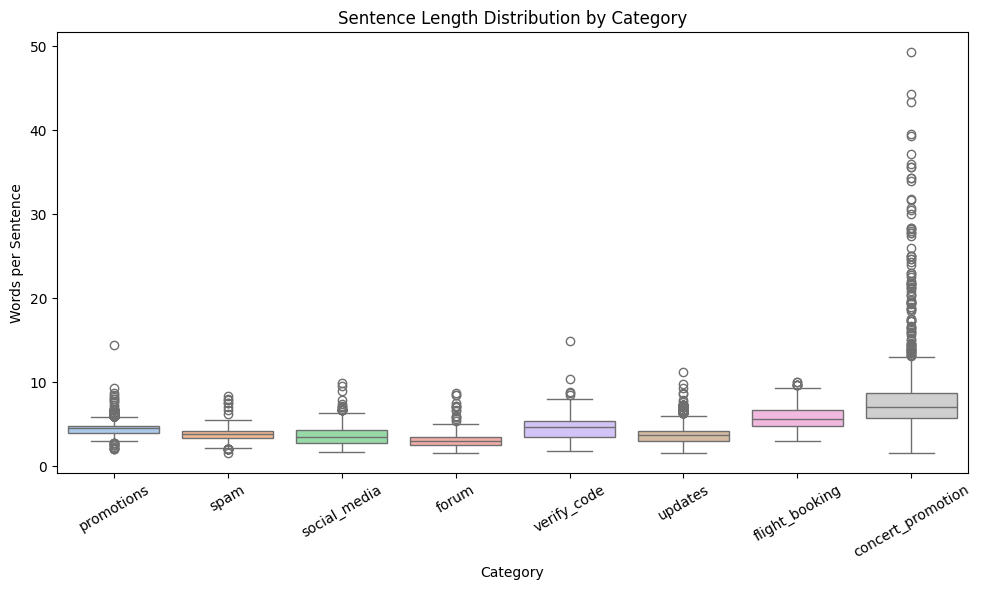

/var/folders/9l/kq1mmmwx18z_86g2n0vlx6dh0000gn/T/ipykernel_69994/460032022.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="category", y="word_count", data=df, inner="quartile", palette="muted")


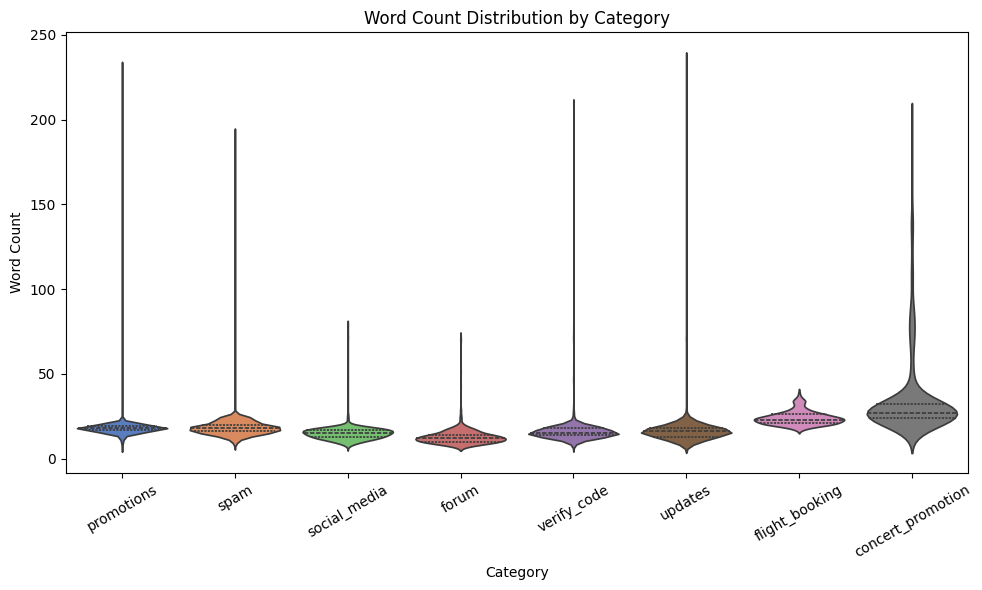


Top 20 Most Frequent Words (excluding <3-letter):
com             7239
your            4362
for             3415
code            2511
new             2369
off             1849
you             1728
now             1698
example         1597
flight          1503
site            1474
from            1414
view            1353
the             1353
support         1323
with            1190
live            1152
social          1125
account         1092
thread          1076


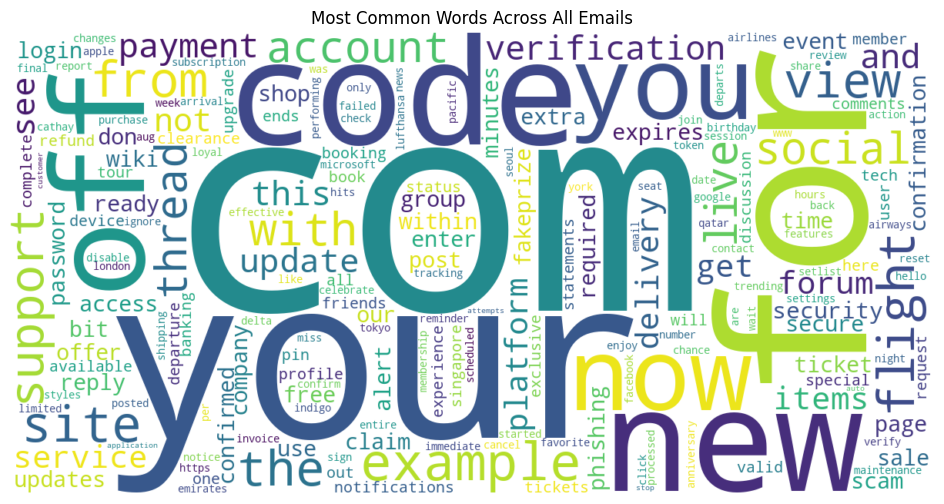

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re

# ---------------------------------------------------
#  Sentence length histogram per category
# ---------------------------------------------------
def plot_sentence_length_distribution(df):
    df["sentence_count"] = df["text"].apply(lambda x: len(re.split(r"[.!?]", str(x))) or 1)
    df["words_per_sentence"] = df["text"].apply(lambda x: len(str(x).split())) / df["sentence_count"]
    plt.figure(figsize=(10,6))
    sns.boxplot(x="category", y="words_per_sentence", data=df, palette="pastel")
    plt.title("Sentence Length Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Words per Sentence")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------
# Word count distribution
#
# ---------------------------------------------------
def plot_wordcount_violin(df):
    df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10,6))
    sns.violinplot(x="category", y="word_count", data=df, inner="quartile", palette="muted")
    plt.title("Word Count Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Word Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------
# Repeated-word frequencies
# ---------------------------------------------------
def repeated_word_analysis(df):
    all_words = " ".join(df["text"].astype(str).tolist()).lower()
    words = re.findall(r"\b[a-zA-Z]{3,}\b", all_words)
    word_freq = Counter(words)
    most_common = word_freq.most_common(20)

    print("\nTop 20 Most Frequent Words (excluding <3-letter):")
    for w, c in most_common:
        print(f"{w:<15} {c}")

    # Optional: Word cloud
    wordcloud = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(word_freq)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Words Across All Emails")
    plt.show()

# ---------------------------------------------------
# Run them on train data
# ---------------------------------------------------
plot_sentence_length_distribution(train_df)
plot_wordcount_violin(train_df)
repeated_word_analysis(train_df)


/var/folders/9l/kq1mmmwx18z_86g2n0vlx6dh0000gn/T/ipykernel_69994/3356009704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


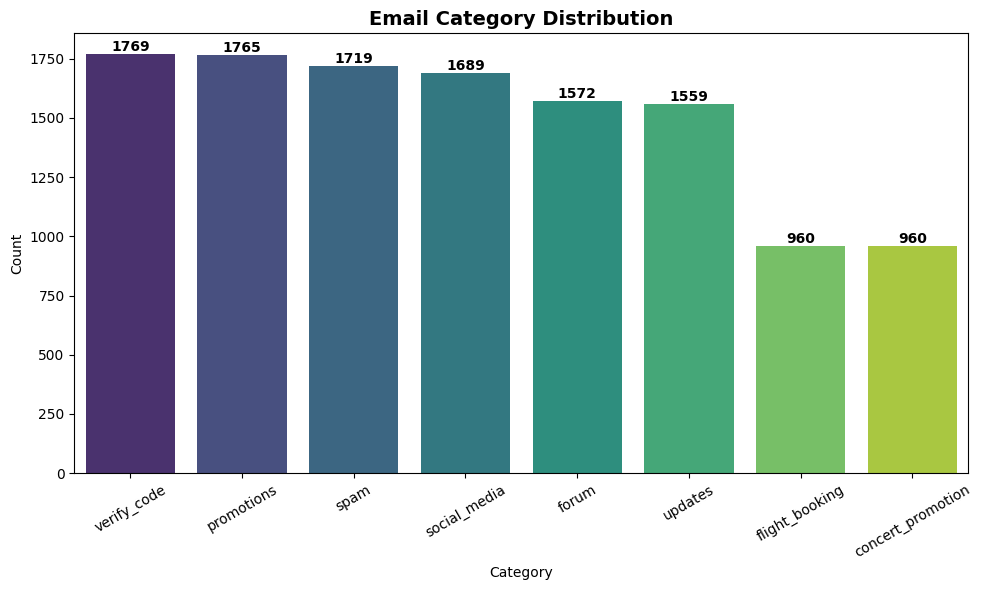

In [15]:
def plot_category_distribution(df):
    plt.figure(figsize=(10, 6))

    # Create count plot ordered by category frequency
    ax = sns.countplot(
        data=df,
        x="category",
        order=df["category"].value_counts().index,
        palette="viridis"  # Optional: adds color
    )

    # Title and labels
    plt.title("Email Category Distribution", fontsize=14, fontweight='bold')
    plt.xlabel("Category")
    plt.ylabel("Count")

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=10, fontweight='bold'
        )

    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
plot_category_distribution(train_df)

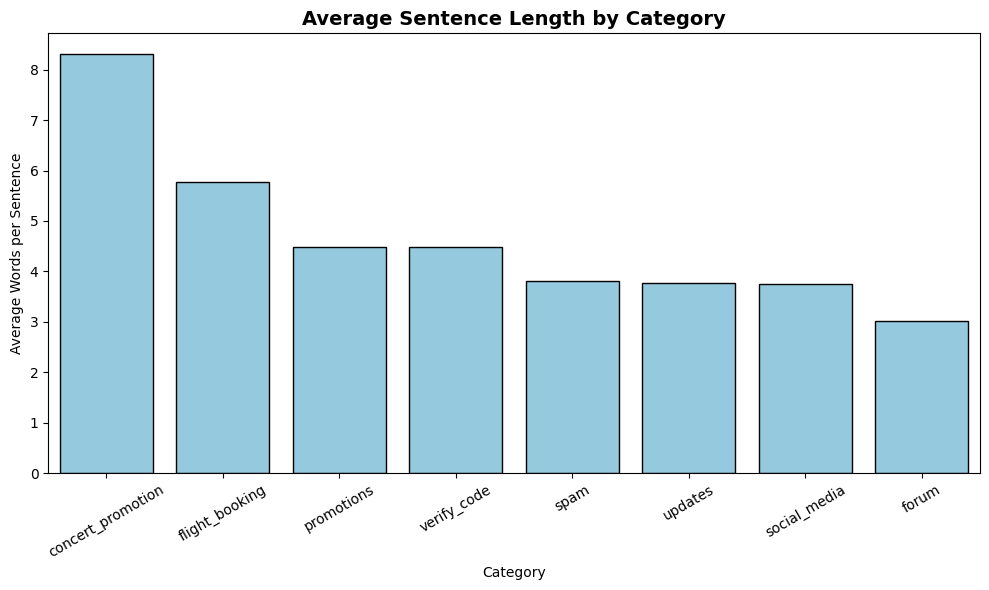

In [16]:
# Compute average words per sentence
def avg_sentence_length_plot(df):
    df["sentence_count"] = df["text"].apply(lambda x: len(re.split(r"[.!?]", str(x))) or 1)
    df["words_per_sentence"] = df["text"].apply(lambda x: len(str(x).split())) / df["sentence_count"]

    avg_len = df.groupby("category")["words_per_sentence"].mean().sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=avg_len.index, y=avg_len.values, color='skyblue', edgecolor='black')
    plt.title("Average Sentence Length by Category", fontsize=14, fontweight='bold')
    plt.xlabel("Category")
    plt.ylabel("Average Words per Sentence")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Run it
avg_sentence_length_plot(train_df)

## Preprocessing

In [17]:
import re
import math
import pandas as pd
from collections import Counter, defaultdict

URL_RE      = re.compile(r"(https?://\S+|www\.\S+)", re.I)
MONEY_RE    = re.compile(r"(\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?", re.I)
NUMBER_RE   = re.compile(r"\b\d+(?:[\.,]\d+)?\b")
EMOJI_RE    = re.compile(r"[\U0001F300-\U0001FAFF\U00002700-\U000027BF]")
HTML_RE     = re.compile(r"<[^>]+>")
REPLY_FWD_RE= re.compile(r"^\s*(re|fwd)\s*[:\-]", re.I)
PUNCT_RE    = re.compile(r"[^\w\s]")
NON_ASCII_RE= re.compile(r"[^\x00-\x7F]")
REPEAT_CHAR_RE = re.compile(r"(.)\1{3,}")  # 4+ same char in a row (e.g., !!!!! or cooooool)

def _safe_len_tokens(s):
    if not isinstance(s, str):
        return 0, 0
    txt = s.strip()
    if not txt:
        return 0, 0
    tokens = txt.split()
    return len(txt), len(tokens)

def _mk_text_col(df):
    if "text" in df.columns:
        return df["text"].astype(str)
    subj = df["subject"].astype(str) if "subject" in df.columns else ""
    body = df["body"].astype(str) if "body" in df.columns else ""
    return (subj + " " + body).str.strip()

def analyze_email_dataset(df: pd.DataFrame, text_col: str = None, min_tokens_short: int = 4):
    """
    Analyze an email-like dataset and propose cleaning steps.
    Returns: (report_dict, recommendations_list)
    """
    assert isinstance(df, pd.DataFrame), "df must be a pandas DataFrame"

    # Choose text column
    if text_col and text_col in df.columns:
        txt_series = df[text_col].astype(str)
        used_text_col = text_col
    else:
        txt_series = _mk_text_col(df)
        used_text_col = "text" if "text" in df.columns else "subject+body"

    n_rows = len(df)
    recs = []

    # Basic column checks
    required_cols = ["id", "subject", "body", "category", "category_id"]
    missing_cols = [c for c in required_cols if c not in df.columns]
    if missing_cols:
        recs.append(f"Add or derive missing columns: {missing_cols}")

    # NA / empty checks
    na_text = txt_series.isna().sum()
    empty_after_strip = (txt_series.str.strip() == "").sum()

    # Lengths & tokens
    lengths = txt_series.apply(lambda s: _safe_len_tokens(s)[0])
    token_counts = txt_series.apply(lambda s: _safe_len_tokens(s)[1])
    avg_chars = lengths.replace(0, pd.NA).mean()
    avg_tokens = token_counts.replace(0, pd.NA).mean()
    pct_too_short = (token_counts < min_tokens_short).mean() if n_rows else 0.0

    # Pattern counts
    url_counts = txt_series.str.count(URL_RE).fillna(0).astype(int)
    money_counts = txt_series.str.count(MONEY_RE).fillna(0).astype(int)
    number_counts = txt_series.str.count(NUMBER_RE).fillna(0).astype(int)
    emoji_counts = txt_series.str.count(EMOJI_RE).fillna(0).astype(int)
    html_counts = txt_series.str.count(HTML_RE).fillna(0).astype(int)
    reply_fwd_flags = txt_series.str.contains(REPLY_FWD_RE, na=False)
    punct_ratio = txt_series.apply(lambda s: (len(PUNCT_RE.findall(s)) / max(len(s),1)) if isinstance(s,str) else 0)
    non_ascii_ratio = txt_series.apply(lambda s: (len(NON_ASCII_RE.findall(s)) / max(len(s),1)) if isinstance(s,str) else 0)
    repeat_char_counts = txt_series.str.count(REPEAT_CHAR_RE).fillna(0).astype(int)

    # Duplicates / near duplicates
    # Exact duplicates
    dupe_exact = txt_series.duplicated(keep=False).sum()
    # ID duplicates
    dupe_ids = df["id"].duplicated(keep=False).sum() if "id" in df.columns else 0

    # Label distribution
    cat_counts = df["category"].value_counts(dropna=False) if "category" in df.columns else pd.Series(dtype=int)
    cat_id_counts = df["category_id"].value_counts(dropna=False) if "category_id" in df.columns else pd.Series(dtype=int)

    # Heuristic recommendations
    if na_text > 0 or empty_after_strip > 0:
        recs.append(f"Drop rows with missing/empty {used_text_col} ({na_text} NA, {empty_after_strip} empty).")

    if dupe_exact > 0:
        recs.append(f"Drop exact duplicate texts ({dupe_exact} rows).")
    if dupe_ids > 0:
        recs.append(f"Investigate duplicate IDs ({dupe_ids} rows). Keep the earliest or most complete.")

    if pct_too_short > 0.02:
        recs.append(f"Remove ultra-short messages (<{min_tokens_short} tokens): {pct_too_short:.1%} of data (e.g., 'hello', 'ok').")

    if url_counts.any():
        recs.append("Normalize or replace URLs with a placeholder token (e.g., 'URL').")

    if money_counts.any():
        recs.append("Normalize currency/amounts to 'MONEY' to reduce numeric variance.")

    if number_counts.mean() > 0.3:
        recs.append("Normalize general numbers to 'NUMBER' (lots of numeric noise).")

    if html_counts.any():
        recs.append("Strip HTML tags (found HTML-like markup in text).")

    if emoji_counts.mean() > 0:
        recs.append("Optionally remove or map emojis to tokens (depends on your model).")

    high_punct_rows = (punct_ratio > 0.2).mean()  # 20%+ of chars are punctuation
    if high_punct_rows > 0.02:
        recs.append(f"Reduce excessive punctuation (>{20}% of chars) in {high_punct_rows:.1%} of rows.")

    high_non_ascii_rows = (non_ascii_ratio > 0.05).mean()
    if high_non_ascii_rows > 0.02:
        recs.append(f"Normalize or remove non-ASCII noise (non-Latin chars >5% of text) in {high_non_ascii_rows:.1%} of rows.")

    if reply_fwd_flags.mean() > 0.05:
        recs.append(f"Strip leading 'Re:'/'Fwd:' prefixes in subjects (~{reply_fwd_flags.mean():.1%} of items).")

    if repeat_char_counts.mean() > 0:
        recs.append("Collapse repeated characters (e.g., 'cooool'→'cool', '!!!!!'→'!!').")

    # Class imbalance hint
    if not cat_counts.empty:
        top_share = (cat_counts.max() / max(cat_counts.sum(), 1))
        if top_share > 0.55:
            recs.append(f"Class imbalance detected (top class ≈ {top_share:.0%}). Consider class weights or resampling.")

    # Compose report
    report = {
        "rows": n_rows,
        "used_text_col": used_text_col,
        "na_text": int(na_text),
        "empty_after_strip": int(empty_after_strip),
        "avg_chars": float(0 if math.isnan(avg_chars) else avg_chars),
        "avg_tokens": float(0 if math.isnan(avg_tokens) else avg_tokens),
        "pct_too_short(<{} tokens)".format(min_tokens_short): float(pct_too_short),
        "duplicates_text_exact": int(dupe_exact),
        "duplicates_id": int(dupe_ids),
        "mean_urls_per_row": float(url_counts.mean()),
        "mean_money_mentions_per_row": float(money_counts.mean()),
        "mean_numbers_per_row": float(number_counts.mean()),
        "mean_emojis_per_row": float(emoji_counts.mean()),
        "rows_with_html": int((html_counts > 0).sum()),
        "rows_reply_or_fwd_subject": int(reply_fwd_flags.sum()),
        "rows_high_punct_ratio(>0.2)": int((punct_ratio > 0.2).sum()),
        "rows_high_non_ascii_ratio(>0.05)": int((non_ascii_ratio > 0.05).sum()),
        "rows_repeat_chars(>=4)": int((repeat_char_counts > 0).sum()),
        "category_counts": cat_counts.to_dict() if not cat_counts.empty else {},
        "category_id_counts": cat_id_counts.to_dict() if not cat_id_counts.empty else {},
    }

    # Always include a sensible, minimal cleaning recipe at the end
    minimal_recipe = [
        "Lowercase",
        "Replace URLs→'URL', currency→'MONEY', numbers→'NUMBER'",
        "Strip HTML tags",
        "Trim leading 'Re:'/'Fwd:' in subject",
        "Collapse repeated punctuation/letters",
        f"Drop empty and ultra-short (<{min_tokens_short} tokens) rows",
        "Drop exact duplicates",
    ]
    report["minimal_cleaning_recipe"] = minimal_recipe

    # Deduplicate recommendations while preserving order
    seen = set()
    recs_unique = []
    for r in recs:
        if r not in seen:
            recs_unique.append(r)
            seen.add(r)

    return report, recs_unique

In [18]:
report, recommendations = analyze_email_dataset(train_df)
print("=== Summary ===")
for k, v in report.items():
    if k not in {"category_counts", "category_id_counts"}:
        print(f"{k}: {v}")

print("\n=== Category distribution ===")
print(report["category_counts"])

print("\n=== Cleaning recommendations ===")
for i, r in enumerate(recommendations, 1):
    print(f"{i}. {r}")

=== Summary ===
rows: 11993
used_text_col: text
na_text: 0
empty_after_strip: 0
avg_chars: 136.8591678479113
avg_tokens: 18.37938797631952
pct_too_short(<4 tokens): 0.0
duplicates_text_exact: 0
duplicates_id: 0
mean_urls_per_row: 0.027015759192862504
mean_money_mentions_per_row: 0.13266071875260568
mean_numbers_per_row: 2.0051696823146834
mean_emojis_per_row: 0.10372717418494122
rows_with_html: 0
rows_reply_or_fwd_subject: 60
rows_high_punct_ratio(>0.2): 4
rows_high_non_ascii_ratio(>0.05): 0
rows_repeat_chars(>=4): 135
minimal_cleaning_recipe: ['Lowercase', "Replace URLs→'URL', currency→'MONEY', numbers→'NUMBER'", 'Strip HTML tags', "Trim leading 'Re:'/'Fwd:' in subject", 'Collapse repeated punctuation/letters', 'Drop empty and ultra-short (<4 tokens) rows', 'Drop exact duplicates']

=== Category distribution ===
{'verify_code': 1769, 'promotions': 1765, 'spam': 1719, 'social_media': 1689, 'forum': 1572, 'updates': 1559, 'flight_booking': 960, 'concert_promotion': 960}

=== Cleaning re

/var/folders/9l/kq1mmmwx18z_86g2n0vlx6dh0000gn/T/ipykernel_69994/797122591.py:73: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  reply_fwd_flags = txt_series.str.contains(REPLY_FWD_RE, na=False)


In [19]:
print(f"Total rows: {len(train_df):,}")
print(f"Columns: {list(train_df.columns)}")
print(f"Missing values total: {train_df.isnull().sum().sum()}")
print(f"Duplicate text entries: {train_df.duplicated(subset='text').sum()}")

Total rows: 11,993
Columns: ['id', 'subject', 'body', 'text', 'category', 'category_id', 'sentence_count', 'words_per_sentence', 'word_count']
Missing values total: 0
Duplicate text entries: 0


In [ ]:
import re
import pandas as pd

# Non-capturing groups to avoid pandas warnings
URL_RE          = r"(https?://\S+|www\.\S+)"
MONEY_RE        = r"(?:\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?"
NUMBER_TOKEN_RE = r"\b\d+(?:[\.,]\d+)?\b"
HTML_RE         = r"<[^>]+>"
REPEAT_CHAR_RE  = re.compile(r"(.)\1{3,}")                 # used in .apply
REPLY_FWD_RE    = re.compile(r"^\s*(?:re|fwd)\s*[:\-]", re.I)

def _collapse_repeats_str(s: str) -> str:
    return re.sub(REPEAT_CHAR_RE, r"\1\1", s) if isinstance(s, str) else s

def _trim_reply_fwd_subject(subj: str) -> str:
    return re.sub(REPLY_FWD_RE, "", subj).strip() if isinstance(subj, str) else subj

def build_text(df: pd.DataFrame) -> pd.Series:
    subj = df["subject"].astype("string") if "subject" in df.columns else pd.Series("", index=df.index, dtype="string")
    body = df["body"].astype("string")    if "body"    in df.columns else pd.Series("", index=df.index, dtype="string")
    return (subj.fillna("") + " " + body.fillna("")).str.strip()

def clean_dataset(
    df: pd.DataFrame,
    *,
    use_col: str | None = "text",
    drop_exact_dupes: bool = True,
    strip_html: bool = False,     # your scan shows 0 HTML
    trim_reply_fwd: bool = True,  # you have 62
    lowercase: bool = True
) -> tuple[pd.DataFrame, dict]:
    """Returns (df_clean, log). Adds a new column df['text_clean'] and optionally 'subject_clean'."""
    out = df.copy()

    # Subject cleanup (vectorized via .apply only for the prefix trim)
    if trim_reply_fwd and "subject" in out.columns:
        out["subject_clean"] = out["subject"].astype("string").fillna("").apply(_trim_reply_fwd_subject)
    elif "subject" in out.columns:
        out["subject_clean"] = out["subject"].astype("string").fillna("")

    # Choose raw text
    if use_col and use_col in out.columns:
        raw = out[use_col].astype("string").fillna("")
    else:
        raw = build_text(out)

    # --- Vectorized cleaning on the Series ---
    txt = raw

    # Normalize URLs / MONEY / NUMBER
    txt = txt.str.replace(URL_RE, " URL ", regex=True)
    txt = txt.str.replace(MONEY_RE, " MONEY ", regex=True)
    txt = txt.str.replace(NUMBER_TOKEN_RE, " NUMBER ", regex=True)

    # Optional HTML strip
    if strip_html:
        txt = txt.str.replace(HTML_RE, " ", regex=True)

    # Collapse repeated chars (needs .apply)
    txt = txt.apply(_collapse_repeats_str)

    # Lowercase & whitespace normalize
    if lowercase:
        txt = txt.str.lower()
    txt = txt.str.replace(r"\s+", " ", regex=True).str.strip()

    out["text_clean"] = txt

    # Drop empties (safe-guard)
    before = len(out)
    out = out[out["text_clean"].str.len() > 0]
    dropped_empty = before - len(out)

    # Drop exact duplicates
    dupe_dropped = 0
    if drop_exact_dupes:
        before = len(out)
        out = out.drop_duplicates(subset=["text_clean"])
        dupe_dropped = before - len(out)

    log = {
        "rows_before": len(df),
        "rows_after": len(out),
        "dropped_empty": int(dropped_empty),
        "dropped_exact_duplicates": int(dupe_dropped),
        "lowercased": lowercase,
        "normalized_money": True,
        "normalized_numbers": True,
        "normalized_urls": True,
        "collapsed_repeats": True,
        "trimmed_reply_fwd_subject": bool(trim_reply_fwd and "subject" in df.columns),
        "html_stripped": strip_html,
    }
    return out, log

In [21]:
df_clean, log = clean_dataset(train_df, use_col="text", strip_html=False, trim_reply_fwd=True)
print(log)

{'rows_before': 11993, 'rows_after': 10363, 'dropped_empty': 0, 'dropped_exact_duplicates': 1630, 'lowercased': True, 'normalized_money': True, 'normalized_numbers': True, 'normalized_urls': True, 'collapsed_repeats': True, 'trimmed_reply_fwd_subject': True, 'html_stripped': False}


In [22]:
df_clean, log = clean_dataset(train_df, use_col="text", strip_html=False, trim_reply_fwd=True)
print(log)
print("Example before/after:")
print(train_df.loc[0, "text"][:120], "...")
print(df_clean.loc[df_clean.index[0], "text_clean"][:120], "...")

{'rows_before': 11993, 'rows_after': 10363, 'dropped_empty': 0, 'dropped_exact_duplicates': 1630, 'lowercased': True, 'normalized_money': True, 'normalized_numbers': True, 'normalized_urls': True, 'collapsed_repeats': True, 'trimmed_reply_fwd_subject': True, 'html_stripped': False}
Example before/after:
Anniversary Special: Buy one get one free As our loyal customer, get exclusive $60 off $75+: example.com/6058 Offer code ...
anniversary special: buy one get one free as our loyal customer, get exclusive money off money +: example.com/ number of ...


In [26]:
df_clean

,id,subject,body,text,category,category_id,sentence_count,words_per_sentence,word_count,subject_clean,text_clean
0,promotions_582,Anniversary Special: Buy one get one free,"As our loyal customer, get exclusive $60 off $...",Anniversary Special: Buy one get one free As o...,promotions,1,3,6.666667,20,Anniversary Special: Buy one get one free,anniversary special: buy one get one free as o...
1,spam_1629,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,Your Amazon was used on new device Your $5000 ...,spam,3,4,4.250000,17,Your Amazon was used on new device,your amazon was used on new device your money ...
2,spam_322,Re: Your Google inquiry,"Hi, following up about your Google application...","Re: Your Google inquiry Hi, following up about...",spam,3,7,3.142857,22,Your Google inquiry,"re: your google inquiry hi, following up about..."
3,social_media_80,Digital Ritual Experience Creation,Cross-cultural ceremony design. Join: virtualr...,Digital Ritual Experience Creation Cross-cultu...,social_media,2,4,2.750000,11,Digital Ritual Experience Creation,digital ritual experience creation cross-cultu...
4,forum_1351,"Your post was moved to ""Programming Help""","Trending: ""cooking"" (258 comments). View: supp...","Your post was moved to ""Programming Help"" Tren...",forum,0,4,3.250000,13,"Your post was moved to ""Programming Help""","your post was moved to ""programming help"" tren..."
...,...,...,...,...,...,...,...,...,...,...,...
11988,music_415,🤘 The Ultimate Calvin Harris Experience for th...,Calvin Harris is back! Catch them live at Heng...,🤘 The Ultimate Calvin Harris Experience for th...,concert_promotion,6,5,6.600000,33,🤘 The Ultimate Calvin Harris Experience for th...,🤘 the ultimate calvin harris experience for th...
11989,flight_1177,Group Booking Confirmed: Cathay Pacific CA636,Explore New York on 2025-11-12! Flight CA636 w...,Group Booking Confirmed: Cathay Pacific CA636 ...,flight_booking,7,3,6.666667,20,Group Booking Confirmed: Cathay Pacific CA636,group booking confirmed: cathay pacific ca636 ...
11990,music_168,🤘 The Ultimate Die Twice Experience for the t...,Early bird tickets end soon! Die Twice at Quee...,🤘 The Ultimate Die Twice Experience for the t...,concert_promotion,6,4,6.250000,25,🤘 The Ultimate Die Twice Experience for the t...,🤘 the ultimate die twice experience for the to...
11991,music_546,❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,"Good news, Melbourne! Prateek Kuhad is perform...",❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,concert_promotion,6,8,4.375000,35,❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,❤️ get ready for prateek kuhad on number - num...


In [57]:
import re
import pandas as pd

# ---------- Regex patterns ----------
URL_RE          = r"(https?://\S+|www\.\S+)"
MONEY_RE        = r"(?:\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?"
NUMBER_TOKEN_RE = r"\b\d+(?:[\.,]\d+)?\b"
HTML_RE         = r"<[^>]+>"
REPEAT_CHAR_RE  = re.compile(r"(.)\1{3,}")                 
REPLY_FWD_RE    = re.compile(r"^\s*(?:re|fwd)\s*[:\-]", re.I)

# Broad Unicode emoji range
EMOJI_RE = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags
    "\U00002700-\U000027BF"  # dingbats
    "\U0001F900-\U0001F9FF"  # supplemental symbols
    "\U00002600-\U000026FF"  # misc symbols
    "]+",
    flags=re.UNICODE
)

def _collapse_repeats_str(s: str) -> str:
    return re.sub(REPEAT_CHAR_RE, r"\1\1", s) if isinstance(s, str) else s

def _trim_reply_fwd_subject(subj: str) -> str:
    return re.sub(REPLY_FWD_RE, "", subj).strip() if isinstance(subj, str) else subj

def build_text(df: pd.DataFrame) -> pd.Series:
    subj = df["subject"].astype("string") if "subject" in df.columns else pd.Series("", index=df.index, dtype="string")
    body = df["body"].astype("string")    if "body"    in df.columns else pd.Series("", index=df.index, dtype="string")
    return (subj.fillna("") + " " + body.fillna("")).str.strip()

# ---------- Main cleaning ----------
def clean_dataset(
    df: pd.DataFrame,
    *,
    use_col: str | None = "text",
    drop_exact_dupes: bool = True,
    strip_html: bool = False,
    trim_reply_fwd: bool = True,
    lowercase: bool = True,
    remove_emojis: bool = True,
    strip_whitespace: bool = True
) -> tuple[pd.DataFrame, dict]:

    out = df.copy()

    # ---- SUBJECT CLEANING (original logic preserved) ----
    if trim_reply_fwd and "subject" in out.columns:
        out["subject_clean"] = out["subject"].astype("string").fillna("").apply(_trim_reply_fwd_subject)
    elif "subject" in out.columns:
        out["subject_clean"] = out["subject"].astype("string").fillna("")

    if remove_emojis and "subject_clean" in out.columns:
        out["subject_clean"] = out["subject_clean"].str.replace(EMOJI_RE, " ", regex=True)
        # Strip invisible chars + leading/trailing whitespace
        out["subject_clean"] = out["subject_clean"].str.replace(r"^[\s\u200B-\u200D\uFE0F\uFEFF]+", "", regex=True)
        out["subject_clean"] = out["subject_clean"].str.replace(r"[\s\u200B-\u200D\uFE0F\uFEFF]+$", "", regex=True)

    # ---- TEXT CLEANING (unchanged) ----
    if use_col and use_col in out.columns:
        raw = out[use_col].astype("string").fillna("")
    else:
        raw = build_text(out)

    txt = raw
    txt = txt.str.replace(URL_RE, " URL ", regex=True)
    txt = txt.str.replace(MONEY_RE, " MONEY ", regex=True)
    txt = txt.str.replace(NUMBER_TOKEN_RE, " NUMBER ", regex=True)
    if strip_html:
        txt = txt.str.replace(HTML_RE, " ", regex=True)
    if remove_emojis:
        txt = txt.str.replace(EMOJI_RE, " ", regex=True)
    txt = txt.apply(_collapse_repeats_str)
    if lowercase:
        txt = txt.str.lower()
    if strip_whitespace:
        txt = txt.str.replace(r"\s+", " ", regex=True).str.strip()

    txt = txt.str.replace(r"^[\s\u200B-\u200D\uFE0F\uFEFF]+", "", regex=True)
    txt = txt.str.replace(r"[\s\u200B-\u200D\uFE0F\uFEFF]+$", "", regex=True)
    out["text_clean"] = txt

    # Drop empties & duplicates
    before = len(out)
    out = out[out["text_clean"].str.len() > 0]
    dropped_empty = before - len(out)
    dupe_dropped = 0
    if drop_exact_dupes:
        before = len(out)
        out = out.drop_duplicates(subset=["text_clean"])
        dupe_dropped = before - len(out)

    log = {
        "rows_before": len(df),
        "rows_after": len(out),
        "dropped_empty": int(dropped_empty),
        "dropped_exact_duplicates": int(dupe_dropped),
        "lowercased": lowercase,
        "normalized_money": True,
        "normalized_numbers": True,
        "normalized_urls": True,
        "collapsed_repeats": True,
        "trimmed_reply_fwd_subject": bool(trim_reply_fwd and "subject" in df.columns),
        "html_stripped": strip_html,
        "emojis_removed": remove_emojis,
        "whitespace_stripped": strip_whitespace,
    }
    return out, log

In [58]:
df_clean, log = clean_dataset(train_df, use_col="text", strip_html=False, trim_reply_fwd=True)
print(log)

{'rows_before': 11993, 'rows_after': 10363, 'dropped_empty': 0, 'dropped_exact_duplicates': 1630, 'lowercased': True, 'normalized_money': True, 'normalized_numbers': True, 'normalized_urls': True, 'collapsed_repeats': True, 'trimmed_reply_fwd_subject': True, 'html_stripped': False, 'emojis_removed': True, 'whitespace_stripped': True}


In [59]:
df_clean

,id,subject,body,text,category,category_id,sentence_count,words_per_sentence,word_count,subject_clean,text_clean
0,promotions_582,Anniversary Special: Buy one get one free,"As our loyal customer, get exclusive $60 off $...",Anniversary Special: Buy one get one free As o...,promotions,1,3,6.666667,20,Anniversary Special: Buy one get one free,anniversary special: buy one get one free as o...
1,spam_1629,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,Your Amazon was used on new device Your $5000 ...,spam,3,4,4.250000,17,Your Amazon was used on new device,your amazon was used on new device your money ...
2,spam_322,Re: Your Google inquiry,"Hi, following up about your Google application...","Re: Your Google inquiry Hi, following up about...",spam,3,7,3.142857,22,Your Google inquiry,"re: your google inquiry hi, following up about..."
3,social_media_80,Digital Ritual Experience Creation,Cross-cultural ceremony design. Join: virtualr...,Digital Ritual Experience Creation Cross-cultu...,social_media,2,4,2.750000,11,Digital Ritual Experience Creation,digital ritual experience creation cross-cultu...
4,forum_1351,"Your post was moved to ""Programming Help""","Trending: ""cooking"" (258 comments). View: supp...","Your post was moved to ""Programming Help"" Tren...",forum,0,4,3.250000,13,"Your post was moved to ""Programming Help""","your post was moved to ""programming help"" tren..."
...,...,...,...,...,...,...,...,...,...,...,...
11988,music_415,🤘 The Ultimate Calvin Harris Experience for th...,Calvin Harris is back! Catch them live at Heng...,🤘 The Ultimate Calvin Harris Experience for th...,concert_promotion,6,5,6.600000,33,The Ultimate Calvin Harris Experience for the ...,the ultimate calvin harris experience for the ...
11989,flight_1177,Group Booking Confirmed: Cathay Pacific CA636,Explore New York on 2025-11-12! Flight CA636 w...,Group Booking Confirmed: Cathay Pacific CA636 ...,flight_booking,7,3,6.666667,20,Group Booking Confirmed: Cathay Pacific CA636,group booking confirmed: cathay pacific ca636 ...
11990,music_168,🤘 The Ultimate Die Twice Experience for the t...,Early bird tickets end soon! Die Twice at Quee...,🤘 The Ultimate Die Twice Experience for the t...,concert_promotion,6,4,6.250000,25,The Ultimate Die Twice Experience for the tou...,the ultimate die twice experience for the tour...
11991,music_546,❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,"Good news, Melbourne! Prateek Kuhad is perform...",❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,concert_promotion,6,8,4.375000,35,Get Ready for Prateek Kuhad on 06-09-2024 – On...,get ready for prateek kuhad on number - number...


In [64]:
import random, numpy as np, pandas as pd, torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
from typing import Dict, List, Tuple

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

PAD, UNK = "<pad>", "<unk>"

# ----- utils -----
def build_label_maps(labels: List[str]) -> Tuple[Dict[str,int], List[str]]:
    classes = sorted(set(labels))
    return {c:i for i,c in enumerate(classes)}, classes

def build_vocab(texts: List[str], max_vocab=25_000, min_freq=2) -> Tuple[Dict[str,int], List[str]]:
    counter = Counter()
    for t in texts: counter.update(t.split())
    tokens = [t for t,c in counter.items() if c >= min_freq]
    tokens.sort(key=lambda x: (-counter[x], x))
    vocab = [PAD, UNK] + tokens[: max_vocab - 2]
    word_index = {w:i for i,w in enumerate(vocab)}
    return word_index, vocab

def text_to_ids(text: str, word_index: Dict[str,int], max_len=250, pad_idx=0, oov_idx=1) -> List[int]:
    ids = [word_index.get(tok, oov_idx) for tok in text.split()]
    if len(ids) > max_len: ids = ids[:max_len]
    if len(ids) < max_len: ids += [pad_idx] * (max_len - len(ids))
    return ids

class EmailDataset(Dataset):
    def __init__(self, texts: List[str], y: List[int], word_index: Dict[str,int], max_len=250):
        self.texts, self.y, self.word_index, self.max_len = texts, y, word_index, max_len
    def __len__(self): return len(self.texts)
    def __getitem__(self, i):
        ids = torch.tensor(text_to_ids(self.texts[i], self.word_index, self.max_len), dtype=torch.long)
        mask = (ids != 0).long()
        label = torch.tensor(self.y[i], dtype=torch.long)
        return {"input_ids": ids, "attention_mask": mask, "labels": label}

def compute_class_weights(y: np.ndarray, num_classes: int) -> torch.Tensor:
    counts = np.bincount(y, minlength=num_classes).astype(np.float64)
    inv = 1.0 / np.clip(counts, 1, None)
    w = inv * (counts.sum() / (num_classes * counts))
    return torch.tensor(w, dtype=torch.float)

# ----- main -----
def prep_textclean_category(
    df: pd.DataFrame,
    max_len=250, max_vocab=25_000, min_freq=2,
    test_size=0.1, val_size=0.1,
    batch_size=64, num_workers=2
):
    assert "text_clean" in df.columns and "category" in df.columns

    # keep only needed + tidy + drop dupes
    work = df[["text_clean", "category"]].copy()
    work["text_clean"] = work["text_clean"].astype("string").str.strip()
    work = work[work["text_clean"].str.len() > 0]
    before = len(work)
    work = work.drop_duplicates(subset=["text_clean"])
    dropped_dupes = before - len(work)

    # labels
    labels_str = work["category"].astype(str).tolist()
    label2id, id2label = build_label_maps(labels_str)
    y_all = np.array([label2id[s] for s in labels_str], dtype=np.int64)
    texts_all = work["text_clean"].astype(str).tolist()

    # stratified splits
    X_tmp, X_test, y_tmp, y_test = train_test_split(
        texts_all, y_all, test_size=test_size, random_state=SEED, stratify=y_all
    )
    val_ratio_adj = val_size / (1.0 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_tmp, y_tmp, test_size=val_ratio_adj, random_state=SEED, stratify=y_tmp
    )

    # vocab on TRAIN ONLY
    word_index, index2word = build_vocab(X_train, max_vocab=max_vocab, min_freq=min_freq)

    # datasets
    ds_train = EmailDataset(X_train, y_train.tolist(), word_index, max_len=max_len)
    ds_val   = EmailDataset(X_val,   y_val.tolist(),   word_index, max_len=max_len)
    ds_test  = EmailDataset(X_test,  y_test.tolist(),  word_index, max_len=max_len)

    # loaders
    mk = lambda ds, sh=False: DataLoader(ds, batch_size=batch_size, shuffle=sh, num_workers=num_workers, pin_memory=True)
    dl_train, dl_val, dl_test = mk(ds_train, True), mk(ds_val), mk(ds_test)

    # class weights from TRAIN
    class_weights = compute_class_weights(y_train, num_classes=len(id2label))

    stats = {
        "rows_in": len(df),
        "rows_used": len(work),
        "dropped_exact_dupes": int(dropped_dupes),
        "vocab_size": len(index2word),
        "num_classes": len(id2label),
        "splits": {"train": len(ds_train), "val": len(ds_val), "test": len(ds_test)},
        "label2id": label2id,
        "id2label": {i:c for i,c in enumerate(id2label)},
    }

    return {
        "word_index": word_index, "index2word": index2word,
        "label2id": label2id, "id2label": id2label,
        "dl_train": dl_train, "dl_val": dl_val, "dl_test": dl_test,
        "class_weights": class_weights,
        "stats": stats,
    }


In [65]:
bundle = prep_textclean_category(df_clean, max_len=250, max_vocab=25_000, min_freq=2,
                                 test_size=0.1, val_size=0.1, batch_size=64)

print(bundle["stats"])
class_weights = bundle["class_weights"]

{'rows_in': 10363, 'rows_used': 10363, 'dropped_exact_dupes': 0, 'vocab_size': 5220, 'num_classes': 8, 'splits': {'train': 8289, 'val': 1037, 'test': 1037}, 'label2id': {'concert_promotion': 0, 'flight_booking': 1, 'forum': 2, 'promotions': 3, 'social_media': 4, 'spam': 5, 'updates': 6, 'verify_code': 7}, 'id2label': {0: 'concert_promotion', 1: 'flight_booking', 2: 'forum', 3: 'promotions', 4: 'social_media', 5: 'spam', 6: 'updates', 7: 'verify_code'}}


# Model

In [74]:
df_clean

,id,subject,body,text,category,category_id,sentence_count,words_per_sentence,word_count,subject_clean,text_clean
0,promotions_582,Anniversary Special: Buy one get one free,"As our loyal customer, get exclusive $60 off $...",Anniversary Special: Buy one get one free As o...,promotions,1,3,6.666667,20,Anniversary Special: Buy one get one free,anniversary special: buy one get one free as o...
1,spam_1629,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,Your Amazon was used on new device Your $5000 ...,spam,3,4,4.250000,17,Your Amazon was used on new device,your amazon was used on new device your money ...
2,spam_322,Re: Your Google inquiry,"Hi, following up about your Google application...","Re: Your Google inquiry Hi, following up about...",spam,3,7,3.142857,22,Your Google inquiry,"re: your google inquiry hi, following up about..."
3,social_media_80,Digital Ritual Experience Creation,Cross-cultural ceremony design. Join: virtualr...,Digital Ritual Experience Creation Cross-cultu...,social_media,2,4,2.750000,11,Digital Ritual Experience Creation,digital ritual experience creation cross-cultu...
4,forum_1351,"Your post was moved to ""Programming Help""","Trending: ""cooking"" (258 comments). View: supp...","Your post was moved to ""Programming Help"" Tren...",forum,0,4,3.250000,13,"Your post was moved to ""Programming Help""","your post was moved to ""programming help"" tren..."
...,...,...,...,...,...,...,...,...,...,...,...
11988,music_415,🤘 The Ultimate Calvin Harris Experience for th...,Calvin Harris is back! Catch them live at Heng...,🤘 The Ultimate Calvin Harris Experience for th...,concert_promotion,6,5,6.600000,33,The Ultimate Calvin Harris Experience for the ...,the ultimate calvin harris experience for the ...
11989,flight_1177,Group Booking Confirmed: Cathay Pacific CA636,Explore New York on 2025-11-12! Flight CA636 w...,Group Booking Confirmed: Cathay Pacific CA636 ...,flight_booking,7,3,6.666667,20,Group Booking Confirmed: Cathay Pacific CA636,group booking confirmed: cathay pacific ca636 ...
11990,music_168,🤘 The Ultimate Die Twice Experience for the t...,Early bird tickets end soon! Die Twice at Quee...,🤘 The Ultimate Die Twice Experience for the t...,concert_promotion,6,4,6.250000,25,The Ultimate Die Twice Experience for the tou...,the ultimate die twice experience for the tour...
11991,music_546,❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,"Good news, Melbourne! Prateek Kuhad is perform...",❤️ Get Ready for Prateek Kuhad on 06-09-2024 –...,concert_promotion,6,8,4.375000,35,Get Ready for Prateek Kuhad on 06-09-2024 – On...,get ready for prateek kuhad on number - number...


# MPNET + RF

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Sizes → train=8290, test=2073
Classes: ['concert_promotion', 'flight_booking', 'forum', 'promotions', 'social_media', 'spam', 'updates', 'verify_code']


Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]


TEST acc: 0.9778099372889532
TEST f1 (macro): 0.9790435671754185

Classification report (TEST):
                   precision    recall  f1-score   support

concert_promotion     0.9948    0.9948    0.9948       192
   flight_booking     1.0000    1.0000    1.0000       192
            forum     0.9656    0.9757    0.9706       288
       promotions     0.9905    0.9543    0.9721       219
     social_media     0.9670    0.9877    0.9772       326
             spam     0.9790    0.9879    0.9835       331
          updates     0.9600    0.9664    0.9632       298
      verify_code     0.9864    0.9559    0.9709       227

         accuracy                         0.9778      2073
        macro avg     0.9804    0.9779    0.9790      2073
     weighted avg     0.9780    0.9778    0.9778      2073



<Figure size 600x500 with 0 Axes>

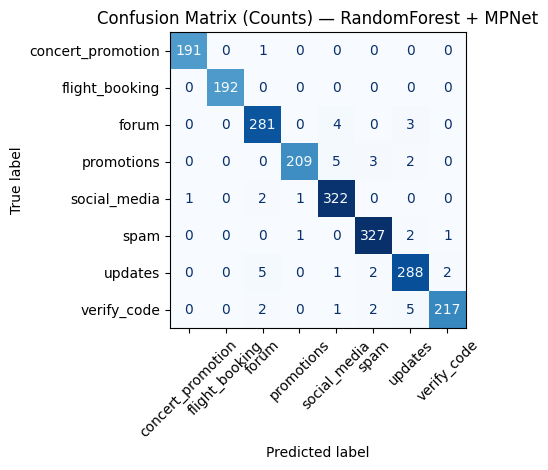

✅ Saved counts CM to: reports/confusion_matrix_counts_rf_mpnet.png


<Figure size 600x500 with 0 Axes>

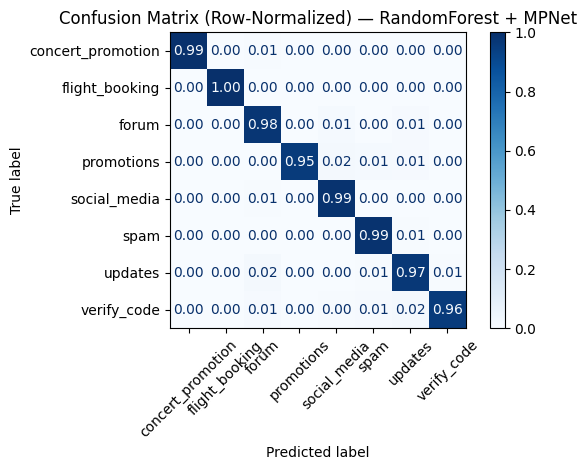

✅ Saved normalized CM to: reports/confusion_matrix_normalized_rf_mpnet.png

✅ Model saved to: saved_models/rf_mpnet_model.joblib
✅ Metadata saved to: saved_models/rf_mpnet_meta.joblib


In [ ]:
# ============================================
# MPNet embeddings → RandomForest classifier (Train/Test only)
# Input: df_clean['text_clean']; Target: df_clean['category']
# ============================================
!pip -q install -U sentence-transformers joblib

import os, random, numpy as np, pandas as pd, torch, joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# ---------- Config & Repro ----------
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = "mps" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"  # 768-dim
MODEL_DIR = "saved_models"
REPORT_DIR = "reports"
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(REPORT_DIR, exist_ok=True)

# ---------- Expect df_clean with ['text_clean', 'category'] ----------
assert "text_clean" in df_clean.columns and "category" in df_clean.columns, \
    "Need text_clean and category columns"

# Drop empties & exact duplicates on text_clean
work = df_clean[["text_clean", "category"]].copy()
work["text_clean"] = work["text_clean"].astype(str).str.strip()
work = work[work["text_clean"].str.len() > 0]
work = work.drop_duplicates(subset=["text_clean"]).reset_index(drop=True)

# ---------- Stratified train/test split ----------
X = work["text_clean"].tolist()
y = work["category"].astype(str).tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)
print(f"Sizes → train={len(X_train)}, test={len(X_test)}")
classes = sorted(list(set(y_train + y_test)))
print("Classes:", classes)

# ---------- MPNet encoder ----------
encoder = SentenceTransformer(MODEL_NAME, device=DEVICE)

def embed_texts(texts, batch_size=128, normalize=True):
    """Return (N, 768) embeddings as float32 numpy array."""
    embs = encoder.encode(
        texts,
        batch_size=batch_size,
        convert_to_numpy=True,
        show_progress_bar=True,
        device=DEVICE,
        normalize_embeddings=normalize,
    )
    return embs.astype(np.float32)

# Cache embeddings
os.makedirs("emb_cache", exist_ok=True)
def cache_or_compute(name, texts):
    path = f"emb_cache/{name}.npy"
    if os.path.exists(path):
        return np.load(path)
    arr = embed_texts(texts)
    np.save(path, arr)
    return arr

Xtr = cache_or_compute("mpnet_train", X_train)
Xte = cache_or_compute("mpnet_test",  X_test)

# ---------- Random Forest ----------
clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=SEED,
)
clf.fit(Xtr, y_train)

# ---------- Test evaluation ----------
yte_pred = clf.predict(Xte)
print("\nTEST acc:", accuracy_score(y_test, yte_pred))
print("TEST f1 (macro):", f1_score(y_test, yte_pred, average="macro"))
print("\nClassification report (TEST):")
print(classification_report(y_test, yte_pred, labels=classes, digits=4))

# ---------- Confusion matrix (counts & normalized) ----------
cm = confusion_matrix(y_test, yte_pred, labels=classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)

plt.figure(figsize=(max(6, 0.6*len(classes)), max(5, 0.6*len(classes))))
cmd.plot(xticks_rotation=45, cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix (Counts) — RandomForest + MPNet")
plt.tight_layout()
counts_path = os.path.join(REPORT_DIR, "confusion_matrix_counts_rf_mpnet.png")
plt.savefig(counts_path, dpi=200)
plt.show()
print(f"✅ Saved counts CM to: {counts_path}")

cm_norm = confusion_matrix(y_test, yte_pred, labels=classes, normalize="true")
cmd_norm = ConfusionMatrixDisplay(cm_norm, display_labels=classes)

plt.figure(figsize=(max(6, 0.6*len(classes)), max(5, 0.6*len(classes))))
cmd_norm.plot(xticks_rotation=45, cmap="Blues", values_format=".2f", colorbar=True)
plt.title("Confusion Matrix (Row-Normalized) — RandomForest + MPNet")
plt.tight_layout()
norm_path = os.path.join(REPORT_DIR, "confusion_matrix_normalized_rf_mpnet.png")
plt.savefig(norm_path, dpi=200)
plt.show()
print(f"✅ Saved normalized CM to: {norm_path}")

# ---------- Save model & metadata ----------
clf_path = os.path.join(MODEL_DIR, "rf_mpnet_model.joblib")
joblib.dump(clf, clf_path)v
print(f"\n✅ Model saved to: {clf_path}")

meta = {
    "classes": classes,
    "model_name": MODEL_NAME,
    "train_size": len(X_train),
    "test_size": len(X_test),
}
meta_path = os.path.join(MODEL_DIR, "rf_mpnet_meta.joblib")
joblib.dump(meta, meta_path)
print(f"✅ Metadata saved to: {meta_path}")

# ---------- Example reload ----------
# clf_loaded = joblib.load(clf_path)
# meta_loaded = joblib.load(meta_path)
# preds = clf_loaded.predict(Xte)

In [ ]:
import re, joblib, torch, numpy as np
from sentence_transformers import SentenceTransformer

# ---------- same regex as training ----------
URL_RE          = re.compile(r"(https?://\S+|www\.\S+)")
MONEY_RE        = re.compile(r"(?:\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?", re.I)
NUMBER_TOKEN_RE = re.compile(r"\b\d+(?:[\.,]\d+)?\b")
REPEAT_CHAR_RE  = re.compile(r"(.)\1{3,}")
EMOJI_RE        = re.compile(
    "[" "\U0001F600-\U0001F64F" "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF" "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF" "\U0001F900-\U0001F9FF" "\U00002600-\U000026FF" "]+",
    flags=re.UNICODE,
)

def clean_one_text(s: str) -> str:
    s = re.sub(URL_RE, " URL ", s)
    s = re.sub(MONEY_RE, " MONEY ", s)
    s = re.sub(NUMBER_TOKEN_RE, " NUMBER ", s)
    s = re.sub(EMOJI_RE, " ", s)
    s = re.sub(REPEAT_CHAR_RE, r"\1\1", s)
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

# ---------- load model + encoder ----------
DEVICE = "cuda" if torch.cuda.is_available() else (
    "mps" if hasattr(torch.backends, "mps") and torch.backends.mps.is_available() else "cpu"
)
MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
encoder = SentenceTransformer(MODEL_NAME, device=DEVICE)

clf = joblib.load("saved_models/rf_mpnet_model.joblib")
meta = joblib.load("saved_models/rf_mpnet_meta.joblib")

# ---------- predict one ----------
def predict_one(text: str):
    text_clean = clean_one_text(text)
    emb = encoder.encode([text_clean], convert_to_numpy=True, normalize_embeddings=True)
    pred = clf.predict(emb)[0]
    proba = clf.predict_proba(emb)[0] if hasattr(clf, "predict_proba") else None
    return pred, proba

In [76]:
text = "Fwd: Anniversary special!!! Get $60 off $75+ today 🎉"
label, prob = predict_one(text)
print("Predicted label:", label)
if prob is not None:
    print("Probabilities:", dict(zip(meta["classes"], prob.round(4))))

Predicted label: promotions
Probabilities: {'concert_promotion': np.float64(0.1133), 'flight_booking': np.float64(0.0533), 'forum': np.float64(0.095), 'promotions': np.float64(0.2783), 'social_media': np.float64(0.175), 'spam': np.float64(0.1117), 'updates': np.float64(0.1317), 'verify_code': np.float64(0.0417)}


In [82]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import re, os, joblib, numpy as np, torch
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sentence_transformers import SentenceTransformer


# ---------- Regex patterns ----------
URL_RE          = re.compile(r"(https?://\S+|www\.\S+)")
MONEY_RE        = re.compile(r"(?:\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?", re.I)
NUMBER_TOKEN_RE = re.compile(r"\b\d+(?:[\.,]\d+)?\b")
HTML_RE         = re.compile(r"<[^>]+>")
REPEAT_CHAR_RE  = re.compile(r"(.)\1{3,}")
EMOJI_RE        = re.compile(
    "[" "\U0001F600-\U0001F64F" "\U0001F300-\U0001F5FF" "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF" "\U00002700-\U000027BF" "\U0001F900-\U0001F9FF"
    "\U00002600-\U000026FF" "]+", flags=re.UNICODE,
)

# ---------- Cleaning Transformer ----------
class Cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, strip_html=False, lowercase=True, remove_emojis=True, strip_whitespace=True):
        self.strip_html = strip_html
        self.lowercase = lowercase
        self.remove_emojis = remove_emojis
        self.strip_whitespace = strip_whitespace

    def fit(self, X, y=None):
        return self

    def _clean(self, s: str) -> str:
        s = str(s or "")
        s = re.sub(URL_RE, " URL ", s)
        s = re.sub(MONEY_RE, " MONEY ", s)
        s = re.sub(NUMBER_TOKEN_RE, " NUMBER ", s)
        if self.strip_html:
            s = re.sub(HTML_RE, " ", s)
        if self.remove_emojis:
            s = re.sub(EMOJI_RE, " ", s)
        s = re.sub(REPEAT_CHAR_RE, r"\1\1", s)
        if self.lowercase:
            s = s.lower()
        if self.strip_whitespace:
            s = re.sub(r"\s+", " ", s).strip()
        s = re.sub(r"^[\s\u200B-\u200D\uFE0F\uFEFF]+", "", s)
        s = re.sub(r"[\s\u200B-\u200D\uFE0F\uFEFF]+$", "", s)
        return s

    def transform(self, X):
        if isinstance(X, str):
            X = [X]
        return [self._clean(x) for x in X]


# ---------- MPNet Encoder Transformer ----------
def _pick_device():
    if torch.cuda.is_available():
        return "cuda"
    if hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        return "mps"
    return "cpu"

class MPNetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, model_name="sentence-transformers/all-mpnet-base-v2", batch_size=64, normalize=True):
        self.model_name = model_name
        self.batch_size = batch_size
        self.normalize = normalize
        self.device = _pick_device()
        self._enc = None

    def _ensure_model(self):
        if self._enc is None:
            self._enc = SentenceTransformer(self.model_name, device=self.device)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        self._ensure_model()
        embs = self._enc.encode(
            X,
            batch_size=self.batch_size,
            convert_to_numpy=True,
            show_progress_bar=False,
            normalize_embeddings=self.normalize,
        )
        return np.asarray(embs, dtype=np.float32)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["_enc"] = None   # don't pickle model weights
        return state


# ---------- Build and save unified pipeline ----------
def build_unified_pipeline(clf_path, out_path="rf_mpnet_full.joblib"):
    if not os.path.exists(clf_path):
        raise FileNotFoundError(clf_path)
    clf = joblib.load(clf_path)

    full_pipe = Pipeline([
        ("clean", Cleaner()),
        ("embed", MPNetEncoder()),
        ("clf", clf),
    ])

    # Save one single joblib (this includes everything)
    joblib.dump(full_pipe, out_path, compress=("xz", 3))
    print(f"✅ Unified pipeline saved → {out_path}")
    return out_path


if __name__ == "__main__":
    # Path to your trained RandomForest model
    clf_path = "saved_models/rf_mpnet_model.joblib"
    build_unified_pipeline(clf_path)

✅ Unified pipeline saved → rf_mpnet_full.joblib


In [83]:
import joblib
model = joblib.load("rf_mpnet_full.joblib")

text = "Fwd: Anniversary special!!! Get $60 off $75+ at example.com 🎉"
pred = model.predict([text])[0]
print("Prediction:", pred)

Prediction: promotions


# MPNET + XGboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Sizes → train=9326, test=1037
Classes: [np.str_('concert_promotion'), np.str_('flight_booking'), np.str_('forum'), np.str_('promotions'), np.str_('social_media'), np.str_('spam'), np.str_('updates'), np.str_('verify_code')]


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Class weights (train): {np.str_('concert_promotion'): np.float64(1.3508), np.str_('flight_booking'): np.float64(1.3492), np.str_('forum'): np.float64(0.8981), np.str_('promotions'): np.float64(1.1847), np.str_('social_media'): np.float64(0.7946), np.str_('spam'): np.float64(0.7819), np.str_('updates'): np.float64(0.8706), np.str_('verify_code'): np.float64(1.1429)}

TEST acc: 0.9797492767598843
TEST f1 (macro): 0.9810600330733872

Classification report (TEST):
                   precision    recall  f1-score   support

concert_promotion     0.9897    1.0000    0.9948        96
   flight_booking     1.0000    1.0000    1.0000        96
            forum     0.9589    0.9722    0.9655       144
       promotions     0.9908    0.9818    0.9863       110
     social_media     0.9815    0.9755    0.9785       163
             spam     0.9763    0.9940    0.9851       166
          updates     0.9730    0.9664    0.9697       149
      verify_code     0.9818    0.9558    0.9686       113

  

<Figure size 600x500 with 0 Axes>

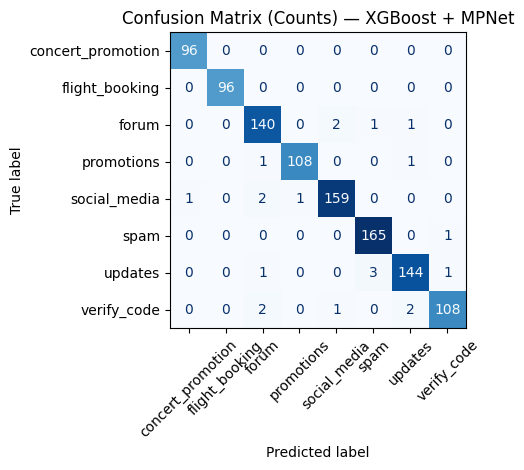

✅ Saved counts CM to: reports/confusion_matrix_counts_xgb_mpnet.png


<Figure size 600x500 with 0 Axes>

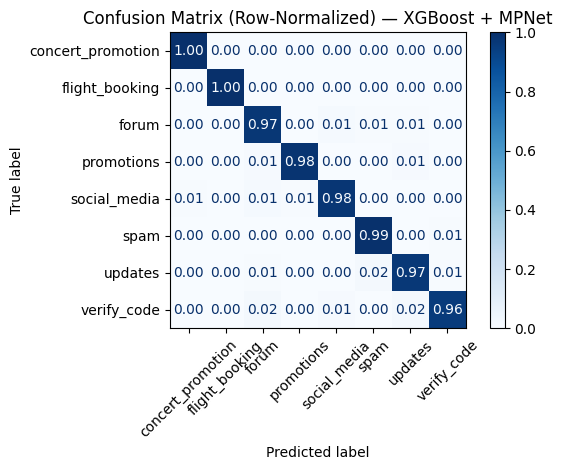

✅ Saved normalized CM to: reports/confusion_matrix_normalized_xgb_mpnet.png

✅ Model saved to: saved_models/xgb_mpnet_model.joblib
✅ LabelEncoder saved to: saved_models/label_encoder.joblib
✅ Metadata saved to: saved_models/xgb_mpnet_meta.joblib


In [73]:
# ============================================
# MPNet embeddings → XGBoost classifier (Train/Test only) + Confusion Matrix
# ============================================
!pip -q install -U sentence-transformers xgboost joblib

import os, random, numpy as np, pandas as pd, torch, joblib, hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt

# ---------- Config & Repro ----------
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"  # 768-dim
MODEL_DIR, REPORT_DIR, CACHE_DIR = "saved_models", "reports", "emb_cache"
os.makedirs(MODEL_DIR, exist_ok=True); os.makedirs(REPORT_DIR, exist_ok=True); os.makedirs(CACHE_DIR, exist_ok=True)

# ---------- Expect df_clean with ['text_clean', 'category'] ----------
assert "text_clean" in df_clean.columns and "category" in df_clean.columns, "Need text_clean and category columns"

# Drop empties & exact duplicates on text_clean (safe)
work = df_clean[["text_clean", "category"]].copy()
work["text_clean"] = work["text_clean"].astype(str).str.strip()
work = work[work["text_clean"].str.len() > 0]
work = work.drop_duplicates(subset=["text_clean"]).reset_index(drop=True)

# ---------- Stratified split (train/test only) ----------
X = work["text_clean"].tolist()
y = work["category"].astype(str).tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=SEED, stratify=y
)
print(f"Sizes → train={len(X_train)}, test={len(X_test)}")

# ---------- Label encoding ----------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)
classes = le.classes_
num_classes = len(classes)
print("Classes:", list(classes))

# ---------- MPNet encoder ----------
encoder = SentenceTransformer(MODEL_NAME, device=DEVICE)

def embed_texts(texts, batch_size=128, normalize=True):
    """Return (N, 768) embeddings as float32 numpy array."""
    embs = encoder.encode(
        texts, batch_size=batch_size, convert_to_numpy=True,
        show_progress_bar=True, device=DEVICE, normalize_embeddings=normalize,
    )
    return embs.astype(np.float32)

def _cache_path(split_name, texts):
    # Minimal fingerprint so we invalidate when the split changes
    h = hashlib.sha1()
    h.update(str(len(texts)).encode())
    if texts:
        h.update(texts[0].encode("utf-8", "ignore"))
        h.update(texts[-1].encode("utf-8", "ignore"))
    fp = h.hexdigest()[:10]
    return os.path.join(CACHE_DIR, f"mpnet_{split_name}_{len(texts)}_{fp}.npy")

def cache_or_compute(split_name, texts):
    path = _cache_path(split_name, texts)
    if os.path.exists(path):
        arr = np.load(path)
        if arr.shape[0] == len(texts):
            return arr
        # stale cache; fall through to recompute
    arr = embed_texts(texts)
    np.save(path, arr)
    return arr

Xtr = cache_or_compute("train", X_train)
Xte = cache_or_compute("test",  X_test)

# ---------- Sample weights (inverse freq, mean≈1) ----------
counts = np.bincount(y_train_enc, minlength=num_classes).astype(np.float64)
class_w = counts.mean() / np.clip(counts, 1, None)
sample_w = class_w[y_train_enc]
print("Class weights (train):", {cls: round(class_w[i], 4) for i, cls in enumerate(classes)})

# ---------- XGBoost multiclass (no eval_set) ----------
params = {
    "objective": "multi:softprob",
    "num_class": num_classes,
    "eval_metric": "mlogloss",
    "learning_rate": 0.05,
    "n_estimators": 800,
    "max_depth": 8,
    "subsample": 0.9,
    "colsample_bytree": 0.8,
    "reg_lambda": 1.0,
    "reg_alpha": 0.0,
    "tree_method": "hist",
    "random_state": SEED,
    "n_jobs": -1,
}
clf = xgb.XGBClassifier(**params)
clf.fit(Xtr, y_train_enc, sample_weight=sample_w, verbose=False)

# ---------- Test evaluation ----------
yte_pred_enc = clf.predict(Xte)
print("\nTEST acc:", accuracy_score(y_test_enc, yte_pred_enc))
print("TEST f1 (macro):", f1_score(y_test_enc, yte_pred_enc, average="macro"))
print("\nClassification report (TEST):")
print(classification_report(y_test_enc, yte_pred_enc, target_names=classes, digits=4))

# ---------- Confusion matrix (counts & normalized) ----------
cm = confusion_matrix(y_test_enc, yte_pred_enc, labels=np.arange(len(classes)))
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
plt.figure(figsize=(max(6, 0.6*len(classes)), max(5, 0.6*len(classes))))
cmd.plot(xticks_rotation=45, cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix (Counts) — XGBoost + MPNet")
plt.tight_layout()
counts_path = os.path.join(REPORT_DIR, "confusion_matrix_counts_xgb_mpnet.png")
plt.savefig(counts_path, dpi=200); plt.show()
print(f"✅ Saved counts CM to: {counts_path}")

cm_norm = confusion_matrix(y_test_enc, yte_pred_enc, labels=np.arange(len(classes)), normalize="true")
cmd_norm = ConfusionMatrixDisplay(cm_norm, display_labels=classes)
plt.figure(figsize=(max(6, 0.6*len(classes)), max(5, 0.6*len(classes))))
cmd_norm.plot(xticks_rotation=45, cmap="Blues", values_format=".2f", colorbar=True)
plt.title("Confusion Matrix (Row-Normalized) — XGBoost + MPNet")
plt.tight_layout()
norm_path = os.path.join(REPORT_DIR, "confusion_matrix_normalized_xgb_mpnet.png")
plt.savefig(norm_path, dpi=200); plt.show()
print(f"✅ Saved normalized CM to: {norm_path}")

# ---------- Save model & artifacts ----------
clf_path  = os.path.join(MODEL_DIR, "xgb_mpnet_model.joblib")
le_path   = os.path.join(MODEL_DIR, "label_encoder.joblib")
meta_path = os.path.join(MODEL_DIR, "xgb_mpnet_meta.joblib")

joblib.dump(clf, clf_path)
joblib.dump(le,  le_path)
joblib.dump(
    {
        "classes": list(classes),
        "model_name": MODEL_NAME,
        "train_size": len(X_train),
        "test_size": len(X_test),
        "params": params,
    },
    meta_path
)

print(f"\n✅ Model saved to: {clf_path}")
print(f"✅ LabelEncoder saved to: {le_path}")
print(f"✅ Metadata saved to: {meta_path}")

In [84]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os, re, joblib, numpy as np, torch
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import Pipeline
from sentence_transformers import SentenceTransformer


# ----------------------------
# Cleaning (matches your rules)
# ----------------------------
URL_RE          = re.compile(r"(https?://\S+|www\.\S+)")
MONEY_RE        = re.compile(r"(?:\$|usd|eur|sgd|£|₹)\s?\d[\d,]*(?:\.\d+)?", re.I)
NUMBER_TOKEN_RE = re.compile(r"\b\d+(?:[\.,]\d+)?\b")
HTML_RE         = re.compile(r"<[^>]+>")
REPEAT_CHAR_RE  = re.compile(r"(.)\1{3,}")
EMOJI_RE        = re.compile(
    "[" "\U0001F600-\U0001F64F" "\U0001F300-\U0001F5FF" "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF" "\U00002700-\U000027BF" "\U0001F900-\U0001F9FF"
        "\U00002600-\U000026FF" "]+",
    flags=re.UNICODE,
)

class Cleaner(BaseEstimator, TransformerMixin):
    """Clean a raw string (or list of strings) to match training-time normalization."""
    def __init__(self, strip_html=False, lowercase=True, remove_emojis=True, strip_whitespace=True):
        self.strip_html = strip_html
        self.lowercase = lowercase
        self.remove_emojis = remove_emojis
        self.strip_whitespace = strip_whitespace

    def fit(self, X, y=None): return self

    def _clean(self, s: str) -> str:
        s = str(s or "")
        s = re.sub(URL_RE, " URL ", s)
        s = re.sub(MONEY_RE, " MONEY ", s)
        s = re.sub(NUMBER_TOKEN_RE, " NUMBER ", s)
        if self.strip_html:
            s = re.sub(HTML_RE, " ", s)
        if self.remove_emojis:
            s = re.sub(EMOJI_RE, " ", s)
        s = re.sub(REPEAT_CHAR_RE, r"\1\1", s)
        if self.lowercase:
            s = s.lower()
        if self.strip_whitespace:
            s = re.sub(r"\s+", " ", s).strip()
        s = re.sub(r"^[\s\u200B-\u200D\uFE0F\uFEFF]+", "", s)
        s = re.sub(r"[\s\u200B-\u200D\uFE0F\uFEFF]+$", "", s)
        return s

    def transform(self, X):
        if isinstance(X, str):
            X = [X]
        return [self._clean(x) for x in X]


# ----------------------------
# MPNet Encoder (lazy-loaded)
# ----------------------------
def _pick_device():
    if torch.cuda.is_available():
        return "cuda"
    if hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        return "mps"
    return "cpu"

class MPNetEncoder(BaseEstimator, TransformerMixin):
    """SentenceTransformer all-mpnet-base-v2 → 768-dim embeddings (normalized)."""
    def __init__(self, model_name="sentence-transformers/all-mpnet-base-v2", batch_size=64, normalize=True):
        self.model_name = model_name
        self.batch_size = batch_size
        self.normalize = normalize
        self.device = _pick_device()
        self._enc = None

    def _ensure(self):
        if self._enc is None:
            self._enc = SentenceTransformer(self.model_name, device=self.device)

    def fit(self, X, y=None): return self

    def transform(self, X):
        self._ensure()
        embs = self._enc.encode(
            X,
            batch_size=self.batch_size,
            convert_to_numpy=True,
            show_progress_bar=False,
            normalize_embeddings=self.normalize,
        )
        return np.asarray(embs, dtype=np.float32)

    def __getstate__(self):
        st = self.__dict__.copy()
        st["_enc"] = None  # keep joblib small; model will lazy-load on use
        return st


# ----------------------------
# XGB + label decoder wrapper
# ----------------------------
class XGBWithDecoder(ClassifierMixin, BaseEstimator):
    """
    Wraps an already-trained xgboost.XGBClassifier (trained on label-encoded ints)
    and a fitted LabelEncoder. predict() returns original string labels;
    predict_proba() returns probabilities in the same order as label_encoder.classes_.
    """
    def __init__(self, clf, label_encoder):
        self.clf = clf
        self.label_encoder = label_encoder
        # cache classes (list[str]) for convenience
        self.classes_ = getattr(self.label_encoder, "classes_", None)

    def fit(self, X, y=None):
        # Not used (already trained)
        return self

    def predict(self, X):
        enc_pred = self.clf.predict(X)
        # enc_pred is numeric (0..K-1); map back to original labels
        return self.label_encoder.inverse_transform(enc_pred.astype(int))

    def predict_proba(self, X):
        # Return proba aligned to label_encoder.classes_
        if hasattr(self.clf, "predict_proba"):
            return self.clf.predict_proba(X)
        raise AttributeError("Underlying classifier does not support predict_proba.")

    def decision_function(self, X):
        # Optional: for API completeness if needed by some tooling
        if hasattr(self.clf, "decision_function"):
            return self.clf.decision_function(X)
        raise AttributeError("Underlying classifier does not support decision_function.")


# ----------------------------
# Build & Save unified pipeline
# ----------------------------
def build_unified_pipeline_xgb(clf_path: str,
                               label_encoder_path: str,
                               out_path: str = "xgb_mpnet_full.joblib"):
    if not os.path.exists(clf_path):
        raise FileNotFoundError(clf_path)
    if not os.path.exists(label_encoder_path):
        raise FileNotFoundError(label_encoder_path)

    clf = joblib.load(clf_path)                 # xgb.XGBClassifier trained on encoded labels
    le  = joblib.load(label_encoder_path)       # fitted LabelEncoder

    full_pipe = Pipeline([
        ("clean", Cleaner()),
        ("embed", MPNetEncoder()),
        ("clf",   XGBWithDecoder(clf=clf, label_encoder=le)),
    ])

    joblib.dump(full_pipe, out_path, compress=("xz", 3))
    print(f"✅ Unified XGB pipeline saved → {out_path}")
    return out_path


if __name__ == "__main__":
    # Adjust paths if yours differ
    build_unified_pipeline_xgb(
        clf_path="saved_models/xgb_mpnet_model.joblib",
        label_encoder_path="saved_models/label_encoder.joblib",
        out_path="saved_models/xgb_mpnet_full.joblib"
    )

✅ Unified XGB pipeline saved → saved_models/xgb_mpnet_full.joblib


In [85]:
import joblib

model = joblib.load("saved_models/xgb_mpnet_full.joblib")

# Single raw text (string)
pred = model.predict(["Fwd: Anniversary special!!! Get $60 off $75+ today 🎉"])[0]
print("Prediction:", pred)


Prediction: promotions


## TextCNNBiGRUAttn

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TextCNNBiGRUAttn(nn.Module):
    """
    Architecture:
      Input (B, 250)
        → Embedding (V=25k, D=300)
        → Multi-scale CNN over time (k = 3,4,5, same-length)
        → BiGRU (hidden per dir=128 → 256 total features)
        → Multi-Head Self-Attention (8 heads)
        → Global pooling (mean + max)
        → Dense + Dropout
        → Output logits (6)
    """
    def __init__(
        self,
        vocab_size: int = 25_000,
        embed_dim: int = 300,
        pad_idx: int = 0,
        cnn_channels: int = 128,     # per kernel
        kernels=(3, 4, 5),
        gru_hidden: int = 128,       # per direction → 256 total
        num_heads: int = 8,
        fc_hidden: int = 128,
        num_classes: int = 6,
        dropout: float = 0.3,
        freeze_embed: bool = False,
    ):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        if freeze_embed:
            for p in self.embed.parameters():
                p.requires_grad = False

        # Multi-scale temporal CNN (Conv1d expects [B, C_in, T])
        self.convs = nn.ModuleList([
            nn.Conv1d(
                in_channels=embed_dim,
                out_channels=cnn_channels,
                kernel_size=k,
                padding=k // 2,       # "same" length for odd k
            )
            for k in kernels
        ])
        conv_out_dim = cnn_channels * len(kernels)

        # Project CNN concat → GRU input size
        self.proj = nn.Linear(conv_out_dim, gru_hidden * 2)  # match BiGRU input

        # BiGRU (batch_first=True → [B, T, F])
        self.gru = nn.GRU(
            input_size=gru_hidden * 2,
            hidden_size=gru_hidden,
            num_layers=1,
            batch_first=True,
            bidirectional=True,
        )
        gru_out_dim = gru_hidden * 2  # 256 total as requested

        # Multi-head self-attention (batch_first for convenience)
        self.attn = nn.MultiheadAttention(
            embed_dim=gru_out_dim,
            num_heads=num_heads,
            batch_first=True,
        )

        # Final MLP head: we concatenate mean & max pool → 2 * gru_out_dim
        pooled_dim = gru_out_dim * 2
        self.fc = nn.Sequential(
            nn.Linear(pooled_dim, fc_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_hidden, fc_hidden // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_hidden // 2, num_classes),
        )

        self.dropout = nn.Dropout(dropout)
        self._init_weights()

    def _init_weights(self):
        # Kaiming for convs/linear; xavier for proj/attn; embeddings default
        for conv in self.convs:
            nn.init.kaiming_normal_(conv.weight, nonlinearity='relu')
            if conv.bias is not None:
                nn.init.zeros_(conv.bias)
        for m in self.fc:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                nn.init.zeros_(m.bias)
        nn.init.xavier_uniform_(self.proj.weight)
        nn.init.zeros_(self.proj.bias)

    def forward(
        self,
        input_ids: torch.Tensor,          # [B, T]
        attention_mask: torch.Tensor = None,  # [B, T], 1 for real tokens, 0 for pad
    ):
        # Embedding
        x = self.embed(input_ids)         # [B, T, E]
        x = self.dropout(x)

        # CNN over time
        x_cnn = x.transpose(1, 2)         # [B, E, T]
        features = []
        for conv in self.convs:
            h = conv(x_cnn)               # [B, C, T]
            h = F.relu(h)
            features.append(h)
        h_cat = torch.cat(features, dim=1)       # [B, C_total, T]
        h_cat = h_cat.transpose(1, 2)            # [B, T, C_total]

        # Project to GRU input size
        h_proj = self.proj(h_cat)                # [B, T, 2*gru_hidden]

        # BiGRU
        h_gru, _ = self.gru(h_proj)              # [B, T, 2*gru_hidden]
        h_gru = self.dropout(h_gru)

        # Self-attention (key_padding_mask: True where PADs)
        key_padding_mask = None
        if attention_mask is not None:
            key_padding_mask = (attention_mask == 0)  # [B, T] bool

        h_attn, _ = self.attn(
            query=h_gru,
            key=h_gru,
            value=h_gru,
            key_padding_mask=key_padding_mask,
            need_weights=False,
        )                                          # [B, T, 2*gru_hidden]
        h_attn = self.dropout(h_attn)

        # Global pooling (mask-aware)
        if attention_mask is not None:
            mask = attention_mask.unsqueeze(-1).type_as(h_attn)  # [B, T, 1]
            # Avoid dividing by zero: clamp denom to at least 1
            denom = mask.sum(dim=1).clamp(min=1.0)
            mean_pool = (h_attn * mask).sum(dim=1) / denom       # [B, F]
            # For max pool, set pad positions to very negative so they don't win
            very_neg = torch.finfo(h_attn.dtype).min
            masked = h_attn.masked_fill(mask == 0, very_neg)
            max_pool, _ = masked.max(dim=1)                      # [B, F]
        else:
            mean_pool = h_attn.mean(dim=1)
            max_pool, _ = h_attn.max(dim=1)

        h_pooled = torch.cat([mean_pool, max_pool], dim=1)       # [B, 2F]

        # Classifier
        logits = self.fc(h_pooled)                                # [B, num_classes]
        return logits



In [ ]:
# ============================================
# Full training script: TextCNNBiGRUAttn
# Input:  text_clean  →  Target: category
# ============================================
import os, math, time, random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.amp import GradScaler
from torch.amp.autocast_mode import autocast
from sklearn.metrics import accuracy_score, f1_score, classification_report

# --------------- Repro & Device ---------------
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pin_memory_flag = (device.type == "cuda")

# =============================================
#                Model definition
# =============================================
class TextCNNBiGRUAttn(nn.Module):
    """
    Input (B, 250)
      → Embedding (V, D=300)
      → Multi-scale CNN (k=3,4,5) [same-length]
      → BiGRU (hidden per dir=128 → 256)
      → Multi-Head Self-Attention (8 heads)
      → Global pooling (mean + max)
      → Dense + Dropout
      → Output logits (C=6)
    """
    def __init__(
        self,
        vocab_size: int,
        embed_dim: int = 300,
        pad_idx: int = 0,
        cnn_channels: int = 128,
        kernels=(3, 4, 5),
        gru_hidden: int = 128,
        num_heads: int = 8,
        fc_hidden: int = 128,
        num_classes: int = 6,
        dropout: float = 0.3,
        freeze_embed: bool = False,
    ):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        if freeze_embed:
            for p in self.embed.parameters():
                p.requires_grad = False

        # Use padding="same" so T is preserved even for even kernels (e.g., k=4)
        self.convs = nn.ModuleList([
            nn.Conv1d(
                in_channels=embed_dim,
                out_channels=cnn_channels,
                kernel_size=k,
                padding="same"
            )
            for k in kernels
        ])
        self.kernels = kernels
        self.cnn_channels = cnn_channels
        conv_out_dim = cnn_channels * len(kernels)

        self.proj = nn.Linear(conv_out_dim, gru_hidden * 2)  # to BiGRU input
        self.gru = nn.GRU(
            input_size=gru_hidden * 2,
            hidden_size=gru_hidden,
            num_layers=1,
            batch_first=True,
            bidirectional=True,
        )
        gru_out_dim = gru_hidden * 2

        self.attn = nn.MultiheadAttention(
            embed_dim=gru_out_dim,
            num_heads=num_heads,
            batch_first=True,
        )

        pooled_dim = gru_out_dim * 2  # mean + max concat
        self.fc = nn.Sequential(
            nn.Linear(pooled_dim, fc_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_hidden, fc_hidden // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_hidden // 2, num_classes),
        )
        self.dropout = nn.Dropout(dropout)
        self._init_weights()

    def _init_weights(self):
        for conv in self.convs:
            nn.init.kaiming_normal_(conv.weight, nonlinearity='relu')
            if conv.bias is not None:
                nn.init.zeros_(conv.bias)
        for m in self.fc:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                nn.init.zeros_(m.bias)
        nn.init.xavier_uniform_(self.proj.weight)
        nn.init.zeros_(self.proj.bias)

    def forward(self, input_ids: torch.Tensor, attention_mask: torch.Tensor = None):
        # Embeddings
        x = self.embed(input_ids)           # [B, T, E]
        x = self.dropout(x)
        x_cnn = x.transpose(1, 2)           # [B, E, T]
        T = x_cnn.size(-1)

        # Multi-scale CNN with safety crop/pad (in case 'same' not supported)
        feats = []
        for conv in self.convs:
            h = conv(x_cnn)                 # [B, C, T?]
            if h.size(-1) != T:
                if h.size(-1) > T:
                    h = h[..., :T]
                else:
                    h = F.pad(h, (0, T - h.size(-1)))
            h = F.relu(h)
            feats.append(h)

        h_cat = torch.cat(feats, dim=1)     # [B, C_total, T]
        h_cat = h_cat.transpose(1, 2)       # [B, T, C_total]

        # Project → BiGRU
        h_proj = self.proj(h_cat)           # [B, T, 2*H]
        h_gru, _ = self.gru(h_proj)         # [B, T, 2*H]
        h_gru = self.dropout(h_gru)

        # Self-attention (mask True where pads)
        key_padding_mask = None
        if attention_mask is not None:
            key_padding_mask = (attention_mask == 0)

        h_attn, _ = self.attn(
            query=h_gru, key=h_gru, value=h_gru,
            key_padding_mask=key_padding_mask,
            need_weights=False,
        )                                    # [B, T, 2*H]
        h_attn = self.dropout(h_attn)

        # Global mean/max pooling (mask-aware)
        if attention_mask is not None:
            mask = attention_mask.unsqueeze(-1).type_as(h_attn)  # [B, T, 1]
            denom = mask.sum(dim=1).clamp(min=1.0)
            mean_pool = (h_attn * mask).sum(dim=1) / denom
            very_neg = torch.finfo(h_attn.dtype).min
            max_pool, _ = h_attn.masked_fill(mask == 0, very_neg).max(dim=1)
        else:
            mean_pool = h_attn.mean(dim=1)
            max_pool, _ = h_attn.max(dim=1)

        h_pooled = torch.cat([mean_pool, max_pool], dim=1)       # [B, 4*H]
        logits = self.fc(h_pooled)                                # [B, C]
        return logits

# --------------- Utilities ---------------
def count_params(m: nn.Module) -> int:
    return sum(p.numel() for p in m.parameters() if p.requires_grad)

def compute_class_weights_from_loader(dl, num_classes: int) -> torch.Tensor:
    # Inverse frequency with mean≈1 (computed on TRAIN only)
    counts = np.zeros(num_classes, dtype=np.int64)
    for batch in dl:
        y = np.array(batch["labels"].tolist(), dtype=np.int64)
        binc = np.bincount(y, minlength=num_classes)
        counts += binc
    weights = counts.mean() / np.clip(counts.astype(np.float64), 1, None)
    return torch.tensor(weights, dtype=torch.float)

# =============================================
#     Instantiate from your preprocessed bundle
# =============================================
# Assumes you already ran:
# bundle = prep_textclean_category(df_clean, ...)
num_classes = len(bundle["id2label"])
vocab_size  = len(bundle["index2word"])

model = TextCNNBiGRUAttn(
    vocab_size=vocab_size,
    embed_dim=300,
    pad_idx=0,
    cnn_channels=128,
    kernels=(3,4,5),
    gru_hidden=128,
    num_heads=8,
    fc_hidden=128,
    num_classes=num_classes,
    dropout=0.3,
    freeze_embed=False,
).to(device)

print(f"Trainable params: {count_params(model):,}")

# Fresh, correct class weights (TRAIN only)
class_weights = compute_class_weights_from_loader(bundle["dl_train"], num_classes).to(device)
print("class_weights:", class_weights.detach().cpu().numpy().round(4).tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = AdamW(model.parameters(), lr=2e-3, weight_decay=1e-2)

# ---------------- LR Scheduler (cosine + warmup) ----------------
steps_per_epoch = len(bundle["dl_train"])
total_epochs    = 10
warmup_steps    = steps_per_epoch
total_steps     = steps_per_epoch * total_epochs

def cosine_lr(step, base_lr=2e-3, total=total_steps, warmup=warmup_steps):
    if step < warmup:
        return base_lr * float(step + 1) / float(max(1, warmup))
    progress = (step - warmup) / max(1, total - warmup)
    return base_lr * (0.1 + 0.9 * 0.5 * (1 + math.cos(math.pi * progress)))

# AMP scaler
scaler = GradScaler("cuda", enabled=(device.type == "cuda"))

# --------------- Train / Eval loops ---------------
def run_epoch(model, loader, train=True, max_grad_norm=1.0, step_start=0):
    model.train(train)
    all_preds, all_labels = [], []
    running_loss = 0.0
    step = step_start

    for batch in loader:
        ids  = batch["input_ids"].to(device, non_blocking=True)
        mask = batch["attention_mask"].to(device, non_blocking=True)
        y    = batch["labels"].to(device, non_blocking=True)

        if train:
            lr_now = cosine_lr(step)
            for g in optimizer.param_groups: g["lr"] = lr_now
            optimizer.zero_grad(set_to_none=True)

        with autocast(device_type="cuda", enabled=(device.type=="cuda")):
            logits = model(ids, attention_mask=mask)
            loss = criterion(logits, y)

        if train:
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            scaler.step(optimizer)
            scaler.update()
            step += 1

        running_loss += loss.item() * ids.size(0)
        all_preds.extend(logits.argmax(1).detach().cpu().tolist())
        all_labels.extend(y.detach().cpu().tolist())

    avg_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    f1m = f1_score(all_labels, all_preds, average="macro")
    return avg_loss, acc, f1m, step

def train_model(
    model,
    dl_train,
    dl_val,
    epochs=10,
    patience=3,
    ckpt_path="best_textcnn_bigru_attn.pt",
):
    best_val_f1, best_epoch, no_improve, step = -1.0, -1, 0, 0
    for epoch in range(1, epochs+1):
        t0 = time.time()
        tr_loss, tr_acc, tr_f1, step = run_epoch(model, dl_train, True, step_start=step)
        va_loss, va_acc, va_f1, _   = run_epoch(model, dl_val,   False)
        print(f"Epoch {epoch:02d}: "
              f"train_loss={tr_loss:.4f} acc={tr_acc:.4f} f1={tr_f1:.4f} | "
              f"val_loss={va_loss:.4f} acc={va_acc:.4f} f1={va_f1:.4f} | "
              f"{time.time()-t0:.1f}s")
        if va_f1 > best_val_f1:
            best_val_f1, best_epoch, no_improve = va_f1, epoch, 0
            torch.save({"model_state": model.state_dict()}, ckpt_path)
            print(f"  ↳ saved best to {ckpt_path}")
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping (best F1={best_val_f1:.4f} @ epoch {best_epoch})")
                break

    if os.path.exists(ckpt_path):
        state = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(state["model_state"])
    return best_val_f1, best_epoch

# ---------------- Train ----------------
best_f1, best_epoch = train_model(
    model,
    bundle["dl_train"],
    bundle["dl_val"],
    epochs=total_epochs,
    patience=3,
    ckpt_path="best_textcnn_bigru_attn.pt",
)

# ---------------- Test ----------------
def evaluate(model, loader):
    model.eval()
    total_loss, all_preds, all_labels = 0.0, [], []
    with torch.no_grad():
        for batch in loader:
            ids  = batch["input_ids"].to(device)
            mask = batch["attention_mask"].to(device)
            y    = batch["labels"].to(device)
            logits = model(ids, attention_mask=mask)
            loss   = criterion(logits, y)
            total_loss += loss.item() * ids.size(0)
            all_preds.extend(logits.argmax(1).cpu().tolist())
            all_labels.extend(y.cpu().tolist())
    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    f1m = f1_score(all_labels, all_preds, average="macro")
    return avg_loss, acc, f1m, all_preds, all_labels

test_loss, test_acc, test_f1, yhat, ytrue = evaluate(model, bundle["dl_test"])
print(f"TEST: loss={test_loss:.4f} acc={test_acc:.4f} f1_macro={test_f1:.4f}")

names = [bundle["id2label"][i] for i in range(len(bundle["id2label"]))]
print(classification_report(ytrue, yhat, target_names=names, digits=4))

Trainable params: 1,894,770
class_weights: [0.9753999710083008, 1.2864999771118164, 0.8632000088691711, 0.8496000170707703, 0.945900022983551, 1.2424999475479126]


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/conv.py:366: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /pytorch/aten/src/ATen/native/Convolution.cpp:1027.)
  return F.conv1d(


Epoch 01: train_loss=0.7662 acc=0.6985 f1=0.7003 | val_loss=0.1869 acc=0.9373 f1=0.9361 | 5.2s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 02: train_loss=0.2350 acc=0.9243 f1=0.9238 | val_loss=0.2503 acc=0.9444 f1=0.9441 | 2.9s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 03: train_loss=0.1962 acc=0.9383 f1=0.9379 | val_loss=0.1907 acc=0.9503 f1=0.9524 | 3.0s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 04: train_loss=0.1438 acc=0.9520 f1=0.9526 | val_loss=0.1489 acc=0.9550 f1=0.9551 | 3.5s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 05: train_loss=0.1309 acc=0.9588 f1=0.9596 | val_loss=0.1700 acc=0.9550 f1=0.9560 | 3.1s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 06: train_loss=0.1047 acc=0.9661 f1=0.9670 | val_loss=0.2430 acc=0.9574 f1=0.9583 | 3.0s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 07: train_loss=0.0841 acc=0.9735 f1=0.9741 | val_loss=0.2282 acc=0.9586 f1=0.9605 | 3.0s
  ↳ saved best to best_textcnn_bigru_attn.pt
Epoch 08: train_loss